# Go-To-Market (G2M) Strategy Insight for XYZ Firm's Investment Into the Cab Industry

### 1. Problem Definition
The goal of this problem is to explore **Cab Industry data between 2016 and 2018 in the U.S.** using exploratory data analysis and regression techniques to help XYZ pick a suitable cab company to invest into.

We are going to be exploring and hypothesizing inferences about the cab data of two companies, Yellow Company and Pink Company, to provide actionable insights to help the XYZ firm in selecting the more profitable company for them to investment. Additionally, we will train various machine learning regression algorithms with a number of different **cab fare** features/information to predict the profits per cab ride for each cab company. 

In a statement,
> **Research Question:** Which of the 2 cab companies should XYZ investment into and can we predict the profit per trip by either of the cab companies?

### 2. Data
There are **4 individual datasets** that contain cruicial information about cab rides U.S. cities. The time period of the data is between **31/01/2016 to 31/12/2018**. All 4 datasets will be leveraged in this analysis, and they are as follows:
* **Cab_Data.csv** - includes details of transaction for 2 cab companies
* **Customer_ID.csv** - contains a unique identifier which links the customer's demographic details
* **Transaction_ID.csv** - contains transaction to customer mapping and payment mode
* **City.csv** - contains list of U.S. cities, their population, and number of cab users

### 3. Evaluation
> Which company earns more profits and acquires more customers? Which company should the XYZ firm invest into? Can we obtain a model that predicts profits per cab ride for each company with high a high R^2 and low RMSE?

### 4. Preparing the Tools

In [83]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('fivethirtyeight')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Statistical Analysis Libraries
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as sm

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 5. Load Data

In [84]:
# Cab Data
cab_df = pd.read_csv("Cab_Data.csv")
cab_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,1/7/2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,1/3/2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,1/7/2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,1/12/2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,1/6/2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [85]:
# Customer ID Data
customerID_df = pd.read_csv("Customer_ID_Data.csv")
customerID_df.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [86]:
# Transaction ID Data
transactionID_df = pd.read_csv("Transaction_ID_Data.csv")
transactionID_df.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [87]:
# City Data
city_df = pd.read_csv("City_Data.csv")
city_df.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


* After importing all the datasets, it seems column names (except the `city_df`) can be renamed to remove the spaces between some of them so that it is easier to work with them. 
* Additionally, the datasets can be merged as they all share common columns to main dataset; `cab_df`, which contains most the information about the cab rides in the U.S. 
* Furthermore, it seems that the dates can also be simplified into years, months, and day as opposed to the short-date format. This will allow us to treat the days, months, and years as numerical data for the analysis.

### 6. Data Formatting, Combining & Seperating
First, we will remove the white spaces in from the column names in each dataframe then merge on the mapped columns between the dataframes.

In [88]:
# Rename columns in Cab Dataframe by Removing Blank Spaces
cab_df.columns = cab_df.columns.str.replace(' ', '_')
cab_df.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [89]:
# Rename columns in Customer ID Dataframe by Removing Blank Spaces
customerID_df.columns = customerID_df.columns.str.replace(' ', '_')
customerID_df.head(5)

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [90]:
# Rename columns in Transaction ID Dataframe by Removing Blank Spaces
transactionID_df.columns = transactionID_df.columns.str.replace(' ', '_')
transactionID_df.head(5)

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Now that the column names have been made easier to work with, we can merge the dataframes to get one dataframe that contains all the relevant information about cab rides. 

In [91]:
# Merge Cab Data & TransactionID Data on TransactionID column
df = cab_df.merge(transactionID_df, on = 'Transaction_ID')
df.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
5,10000016,1/7/2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash
6,10000017,1/3/2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card
7,10000018,1/7/2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card
8,10000019,1/12/2016,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash
9,10000020,1/6/2016,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash


In [92]:
# Merge Combined Data & CustomerID Data on CustomerID column
df = df.merge(customerID_df, on = 'Customer_ID')
df.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [93]:
# Merge Combined Data & City Data on City column
df = df.merge(city_df, on = 'City')
df.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [94]:
# Format Date_of_Travel into TimeStamp with Datetime
df['Date_of_Travel'] = pd.to_datetime(df['Date_of_Travel'], format = "%m/%d/%Y")

# Extract year, month, day and make them into their own columns
df['Year'] = pd.to_datetime(df['Date_of_Travel']).dt.year
df['Month'] = pd.to_datetime(df['Date_of_Travel']).dt.month
df['Day'] = pd.to_datetime(df['Date_of_Travel']).dt.day

# Drop Date_of_Travel column
df.drop('Date_of_Travel', axis = 1, inplace = True)

# View updated dataframe and Inspect updated datatypes
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM_Travelled        359392 non-null  float64
 4   Price_Charged       359392 non-null  float64
 5   Cost_of_Trip        359392 non-null  float64
 6   Customer_ID         359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income_(USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  object 
 12  Users               359392 non-null  object 
 13  Year                359392 non-null  int64  
 14  Month               359392 non-null  int64  
 15  Day                 359392 non-nul

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21


In [95]:
# Creating the target variable - profit/margin per cab fare
df['Profits'] = df['Price_Charged'] - df['Cost_of_Trip']
df.head(10)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21,253.9808
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018,5,4,50.8912
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701",2018,10,27,25.0960
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2016,1,2,27.5680
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016,9,21,210.0920
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701",2017,6,23,118.9736


In [96]:
# Checking company names
df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

We will seperate the dataframe into two smaller dataframes. Each dataframe will contain information about the individual two cab companies; **Pink Cab** and **Yellow Cab** so that we can easily compare them during the ladder steps of the analysis.

In [97]:
# Yellow Cab company dataframe
yellow_cab_df = df[df['Company'] == 'Yellow Cab']
yellow_cab_df.head(5)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23,194.6480
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21,253.9808
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018,5,4,50.8912
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016,9,21,210.0920


In [98]:
# Pink Cab company dataframe
pink_cab_df = df[df['Company'] == 'Pink Cab']
pink_cab_df.head(5)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8,57.315
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6,23.666
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,"814,885","24,701",2018,10,27,25.096
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",2016,1,2,27.568
11,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",2016,1,7,25.798


Perfect, our data is now in the form we'd like to handle it with. Let's do some Exploratory Data Analysis. 

### 7. Exploratory Data Analysis (EDA)
EDA Template that will be followed for this problem:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have what are different types of data present?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and are they something to be concerned about?
5. How can you add, change or remove features to get more out of your data?

#### 7.1 Data Description

In [99]:
# Shape of Yellow Cab company Dataframe
print(yellow_cab_df.shape)

(274681, 17)


In [100]:
# Shape of Pink Cab company dataframe
print(pink_cab_df.shape)

(84711, 17)


This is interesting; there appears to be almost **3x as many yellow cab company transactions as pink cab company** in the U.S.

In [101]:
# Data types 
print(yellow_cab_df.dtypes)

Transaction_ID          int64
Company                object
City                   object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Customer_ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income_(USD/Month)      int64
Population             object
Users                  object
Year                    int64
Month                   int64
Day                     int64
Profits               float64
dtype: object


* Some features are categorical, whereas most are integers or floats. 
* During the model section of this analysis, we will have to see if these categorical features will play a siginificant role. 

In [102]:
# Function for finding unique values in dataframes
def unique_values_df(df):
    """
    Returns number of unique values per 
    column/feature in a dataframe as transposed
    dataframe. 
    """
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]
    return pd.DataFrame(dict, index = ["# of Unique Values:"]).transpose()

In [103]:
# Number of unique values in each column/feature in Yellow Cab company dataframe
unique_values_df(yellow_cab_df)

,# of Unique Values:
Transaction_ID,274681
Company,1
City,19
KM_Travelled,874
Price_Charged,96854
Cost_of_Trip,9808
Customer_ID,39896
Payment_Mode,2
Gender,2
Age,48


In [104]:
# Number of unique values in each column/feature in Pink Cab company dataframe
unique_values_df(pink_cab_df)

,# of Unique Values:
Transaction_ID,84711
Company,1
City,19
KM_Travelled,874
Price_Charged,47008
Cost_of_Trip,9759
Customer_ID,32330
Payment_Mode,2
Gender,2
Age,48


* After inspecting the unique values and size of the dataframe, it is safe to conclude that **we do not have any repeating transactions** in the Yellow Cab company data. 
* After inspecting the unique values and size of the dataframe, it is safe to condlude that **we do not have any repeating trasnaction** in the Pink Cab company data.

#### 7.2 Handling Missing Values & Duplicates

In [105]:
# Function for finding missing values in dataframes
def missing_values(df):
    """
    Returns number of missing values
    in a given dataframe.
    """
    return df.isnull().sum()

# Function for finding duplicate rows in dataframes
def num_duplicates(df):
    """
    Returns number of duplicate
    rows in a dataframe. 
    """
    duplicates_number = df.duplicated().sum()
    return print("Number of duplicated rows is: " + str(duplicates_number))

In [106]:
# Number of missing values in Yellow Cab company dataframe
missing_values(yellow_cab_df)

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
Year                  0
Month                 0
Day                   0
Profits               0
dtype: int64

In [107]:
# Number of duplicates in Yellow Cab company dataframe
num_duplicates(yellow_cab_df)

Number of duplicated rows is: 0


In [108]:
# Number of missing values in Pink Cab company dataframe
missing_values(pink_cab_df)

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
Year                  0
Month                 0
Day                   0
Profits               0
dtype: int64

In [109]:
# Number of duplicates in Pink Cab company dataframe
num_duplicates(pink_cab_df)

Number of duplicated rows is: 0


* There **no missing values** in both dataframes. 
* There **no duplicate rows** in both dataframes.

#### 7.3 Descriptive Statistics

In [110]:
pink_cab_df.dtypes

Transaction_ID          int64
Company                object
City                   object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Customer_ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income_(USD/Month)      int64
Population             object
Users                  object
Year                    int64
Month                   int64
Day                     int64
Profits               float64
dtype: object

In [111]:
# Seperate the columns into categorical and continuous features
continuous_cols = ["KM_Travelled", "Price_Charged", "Cost_of_Trip", "Age", "Income_(USD/Month)"]
categorical_cols = ["Company", "City", "Payment_Mode", "Gender", "Population", "Users"]
target_col = ["Profits"]

The `Transaction_ID`, `Years`, `Month`, `Day` features were excluded from the summary statistics because their summary statistics do not tell us much about the companies.

In [112]:
# Summary Statistics for features of Yellow Cab company dataframe
yellow_cab_df[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KM_Travelled,274681.0,22.569517,12.234298,1.90,11.99,22.440,32.960,48.00
Price_Charged,274681.0,458.181990,288.386166,20.73,226.68,425.060,633.880,2048.03
Cost_of_Trip,274681.0,297.922004,162.548986,22.80,158.40,295.596,432.432,691.20
Age,274681.0,35.341112,12.578625,18.00,25.00,33.000,42.000,65.00
Income_(USD/Month),274681.0,15045.669817,7962.727062,2000.00,8439.00,14676.000,21023.000,34996.00


In [113]:
# Summary Statistics for features of Pink Cab company dataframe
pink_cab_df[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KM_Travelled,84711.0,22.559917,12.231092,1.9,12.000,22.44,32.960,48.00
Price_Charged,84711.0,310.800856,181.995661,15.6,159.970,298.06,441.505,1623.48
Cost_of_Trip,84711.0,248.148682,135.403345,19.0,131.868,246.33,360.180,576.00
Age,84711.0,35.322414,12.644780,18.0,25.000,33.00,42.000,65.00
Income_(USD/Month),84711.0,15059.047137,7991.077762,2000.0,8371.000,14713.00,21055.000,35000.00


In [114]:
# Summary Statistics for target variable (Profits) of Yellow Cab company dataframe
yellow_cab_df[target_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Profits,274681.0,160.259986,171.823833,-176.9308,37.18,102.0,228.6704,1463.966


In [115]:
# Summary Statistics for target variable (Profits) of Pink Cab company dataframe
pink_cab_df[target_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Profits,84711.0,62.652174,77.590378,-220.06,11.206,41.5,93.965,1119.48


#### 7.4 Exploring Target Variable & Outliers

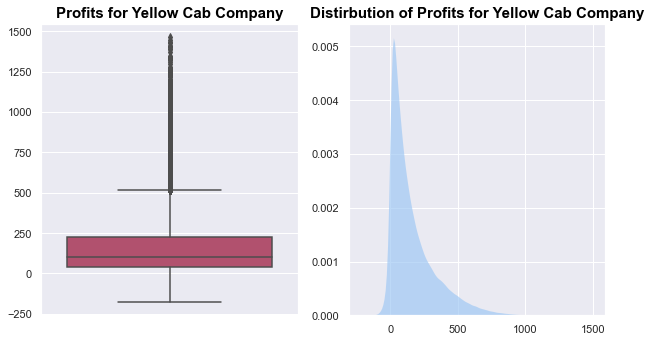

In [116]:
# Density Plot & Box Plot of Target (Profits) for Yellow Cab Company
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (9, 5))

# Boxplot for Yellow Cab Profits 
sns.boxplot(ax = ax1, y = yellow_cab_df['Profits'], palette = 'flare')
ax1.set_title('Profits for Yellow Cab Company', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

# Kernel Density Plot for Yellow Cab Profits
sns.kdeplot(ax = ax2, data = yellow_cab_df, x = 'Profits', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title('Distirbution of Profits for Yellow Cab Company', fontdict = {'fontsize': 15, 'fontweight': 'bold', 
                                                                            'color': '0000'})
ax2.set_xlabel("")
ax2.set_ylabel("");

The yellow cab company appears to have a lot of outliers beyond the upper bound and these transactions have yield really high profits (margins). It seems most of the yellow cab company's profits are around **$500 or less**. The range is large but the profits per transaction definitely seem to indicate that the company is earning well. This company also has many rides that were not profitable, so we will have to do some IQR inspection to verify these findings.

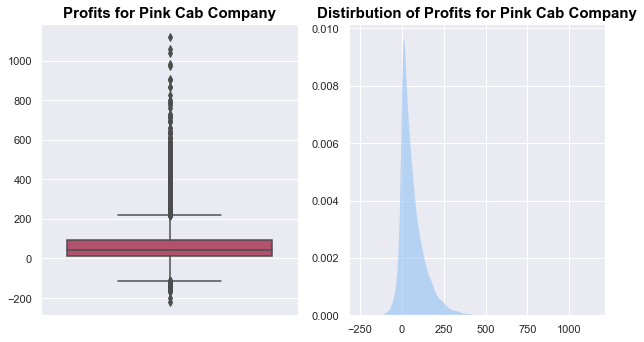

In [117]:
# Density Plot & Box Plot of Target (Profits) for Pink Cab Company
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (9, 5))

# Boxplot for Yellow Cab Profits 
sns.boxplot(ax = ax1, y = pink_cab_df['Profits'], palette = 'flare')
ax1.set_title('Profits for Pink Cab Company', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

# Kernel Density Plot for Pink Cab Profits
sns.kdeplot(ax = ax2, data = pink_cab_df, x = 'Profits', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title('Distirbution of Profits for Pink Cab Company', fontdict = {'fontsize': 15, 'fontweight': 'bold', 
                                                                            'color': '0000'})
ax2.set_xlabel("")
ax2.set_ylabel("");

The pink cab company appears to have a lot of outliers above and below lower/upper bounds. We will inspect these outliers. Furthermore, it seems a vast majority of the Pink Cab company's profits are around **$250 or less**. Interestingly, the lower bound seems to be much lower in the pink cab company when compared to the yellow cab company. Additionally, the highest profits between the two companies all seem to predominately come from the yellow cab company. We will do some IQR inspection to further confirm these findings.

In [118]:
# Using IQR to find bounds of target (profits) for Yellow Cab company
yellow_cab_profits_stats = yellow_cab_df['Profits'].describe()
IQR = yellow_cab_profits_stats['75%'] - yellow_cab_profits_stats['25%']
yellow_cab_upper_bound = yellow_cab_profits_stats['75%'] + 1.5 * IQR
yellow_cab_lower_bound = yellow_cab_profits_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the target are: ", (yellow_cab_upper_bound, yellow_cab_lower_bound))

The upper and lower bounds for the target are:  (515.906, -250.05559999999997)


In [119]:
# Examine the outliers below the lower bound of profits for Yellow Cab company
yellow_cab_df[yellow_cab_df['Profits'] < yellow_cab_lower_bound]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits


In [120]:
# Examine the outliers above the upper bound of profits for Yellow Cab company
yellow_cab_df[yellow_cab_df['Profits'] > yellow_cab_upper_bound]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
24,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,"814,885","24,701",2016,1,2,877.0076
28,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901,"814,885","24,701",2016,1,9,895.7768
41,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,35,17761,"814,885","24,701",2016,1,7,944.1908
46,10000390,Yellow Cab,ATLANTA GA,36.30,1036.84,435.6000,29494,Card,Male,28,5644,"814,885","24,701",2016,1,5,601.2400
49,10000391,Yellow Cab,ATLANTA GA,38.08,1239.72,539.2128,27891,Cash,Male,24,14593,"814,885","24,701",2016,1,9,700.5072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346554,10033711,Yellow Cab,WASHINGTON DC,44.84,1191.97,613.4112,51012,Cash,Female,63,25104,"418,859","127,001",2016,5,8,578.5588
347685,10173969,Yellow Cab,WASHINGTON DC,45.22,1160.14,634.8888,53650,Cash,Male,34,16775,"418,859","127,001",2017,5,7,525.2512
347730,10033742,Yellow Cab,WASHINGTON DC,40.95,1057.28,496.3140,53823,Card,Male,22,14680,"418,859","127,001",2016,5,7,560.9660
354039,10173904,Yellow Cab,WASHINGTON DC,46.80,1231.56,617.7600,51447,Cash,Female,27,23109,"418,859","127,001",2017,5,12,613.8000


In [121]:
# Using IQR to find bounds of target (profits) for Pink Cab company
pink_cab_profits_stats = pink_cab_df['Profits'].describe()
IQR = pink_cab_profits_stats['75%'] - pink_cab_profits_stats['25%']
pink_cab_upper_bound = pink_cab_profits_stats['75%'] + 1.5 * IQR
pink_cab_lower_bound = pink_cab_profits_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the target are: ", (pink_cab_upper_bound, pink_cab_lower_bound))

The upper and lower bounds for the target are:  (218.1035, -112.93249999999999)


In [122]:
# Examine the outliers below the lower bound of profits for Pink Cab company
pink_cab_df[pink_cab_df['Profits'] < pink_cab_lower_bound]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
7605,10004264,Pink Cab,AUSTIN TX,30.38,210.18,331.142,34660,Card,Male,41,3886,"698,371","14,978",2016,1,29,-120.962
13297,10001406,Pink Cab,BOSTON MA,38.88,310.41,435.456,57179,Cash,Male,46,18327,"248,968","80,021",2016,1,13,-125.046
17623,10007279,Pink Cab,BOSTON MA,38.15,338.11,457.800,58157,Card,Female,51,2047,"248,968","80,021",2016,2,10,-119.690
20302,10158029,Pink Cab,BOSTON MA,44.46,379.73,515.736,57155,Card,Female,32,11001,"248,968","80,021",2017,3,29,-136.006
21826,10139761,Pink Cab,BOSTON MA,40.80,341.02,485.520,57550,Cash,Male,63,9405,"248,968","80,021",2017,1,26,-144.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297400,10001723,Pink Cab,SEATTLE WA,28.00,222.54,336.000,37384,Cash,Male,52,23666,"671,238","25,063",2016,1,14,-113.460
297984,10136752,Pink Cab,SEATTLE WA,34.22,263.39,376.420,36454,Card,Male,23,12004,"671,238","25,063",2017,1,12,-113.030
299029,10136743,Pink Cab,SEATTLE WA,38.40,289.14,410.880,36238,Cash,Male,33,16097,"671,238","25,063",2017,1,9,-121.740
301162,10073097,Pink Cab,SEATTLE WA,46.80,384.26,528.840,37888,Card,Male,39,24227,"671,238","25,063",2016,9,11,-144.580


In [123]:
# Examine the outliers above the upper bound of profits for Pink Cab company
pink_cab_df[pink_cab_df['Profits'] > pink_cab_upper_bound]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
273,10004262,Pink Cab,ATLANTA GA,41.20,698.58,461.440,27631,Card,Male,37,18163,"814,885","24,701",2016,1,23,237.140
307,10064184,Pink Cab,ATLANTA GA,33.35,680.07,353.510,27380,Cash,Male,60,4422,"814,885","24,701",2016,8,13,326.560
497,10131463,Pink Cab,ATLANTA GA,26.78,520.66,297.258,28407,Cash,Female,29,15145,"814,885","24,701",2016,12,31,223.402
509,10040458,Pink Cab,ATLANTA GA,41.81,672.93,418.100,29495,Cash,Female,34,18903,"814,885","24,701",2016,6,5,254.830
571,10391852,Pink Cab,ATLANTA GA,41.20,670.66,444.960,29446,Cash,Male,27,3626,"814,885","24,701",2018,10,20,225.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357817,10117319,Pink Cab,WASHINGTON DC,28.89,581.30,312.012,52465,Card,Female,26,23593,"418,859","127,001",2016,12,4,269.288
358001,10141672,Pink Cab,WASHINGTON DC,33.00,646.67,359.700,53638,Cash,Male,39,25711,"418,859","127,001",2017,1,29,286.970
358129,10095991,Pink Cab,WASHINGTON DC,39.78,649.64,421.668,53101,Cash,Male,21,14964,"418,859","127,001",2016,10,27,227.972
358553,10169813,Pink Cab,WASHINGTON DC,30.74,551.63,307.400,52005,Cash,Female,35,4442,"418,859","127,001",2017,5,5,244.230


All outliers in both datasets that are above and below the upper/lower bounds of profits (margins) for both companies will be kept because they tell us 2 possible things about the particular cab ride:
1. If the profits are above the upper bound for a company, the cab is likely an expensive one due to the driver's vehicle, and the region they are traveling in has higher rates due to traffic and demand. 
2. If the profits are below the lower bound for a company, the passenger had some form of a discount token for the ride that reduced the amount they had to pay or they had a bad experience/issue that put the company at fault for the ride that resulted in less payment.

### 8. Data Visualizations

#### 8.1 Univariate Data Visualizations
We will create bar graphs for the categorcial features and histograms for the continuous features to understand their distributions. 

                                      Cab Rides by City for Yellow & Pink Cab Companies:                                     
                                               _______________________________                                               


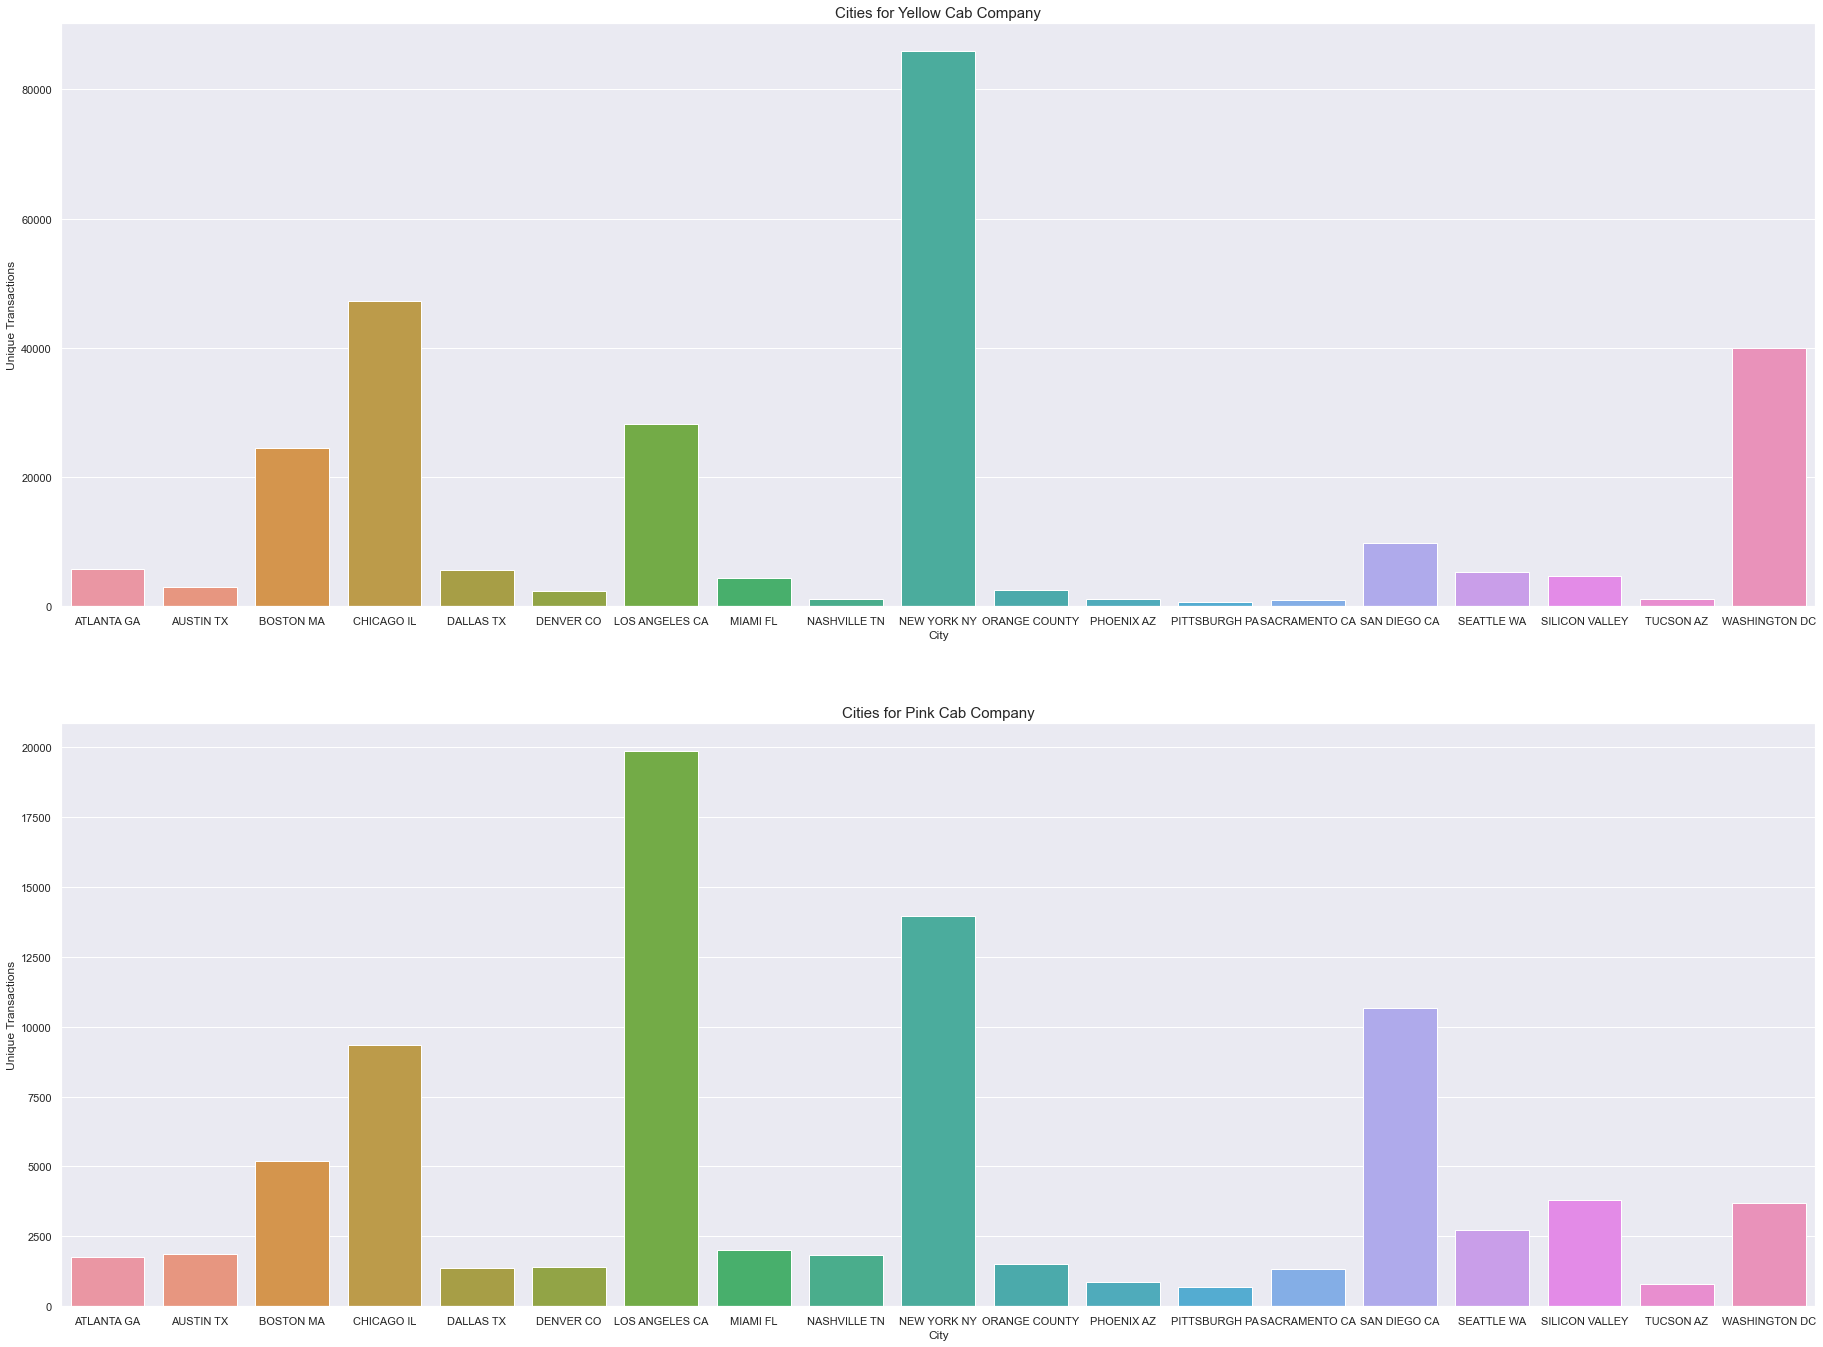

In [124]:
# Title for City Graphs
title_all_graphs = "Cab Rides by City for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (28, 22))

# job type (bar plot)
sns.countplot(ax = ax0, data = yellow_cab_df, x = 'City')
ax0.set_title("Cities for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("City")
ax0.set_ylabel("Unique Transactions")

# degree (bar plot)
sns.countplot(ax = ax1, data = pink_cab_df, x = 'City')
ax1.set_title("Cities for Pink Cab Company", fontsize = 15)
ax1.set_xlabel("City")
ax1.set_ylabel("Unique Transactions");

* It seems the most popular and in-demand cities for these two companies are New York and Los Angeles.
* For the Yellow Cab Company, New York has far more customers than all other cities with a total of over 8000 customers during the time period of this data. 
* For the Pink Cab Company, Los Angeles (Yellow Cab Company still outperforms Pink Cab Company here) is the most in-demand city followed by New York City. 
* Cities like Pheoynix, Pittsburgh, and Tuscon are all not very much in-demand by both companies. 
* Overall, Yellow Cab Company seems to attract more customers regardless of the city when compared to the Pink Cab Company because the transactions are just far greater. 

                                        Payment Modes for Yellow & Pink Cab Companies:                                       
                                               _______________________________                                               


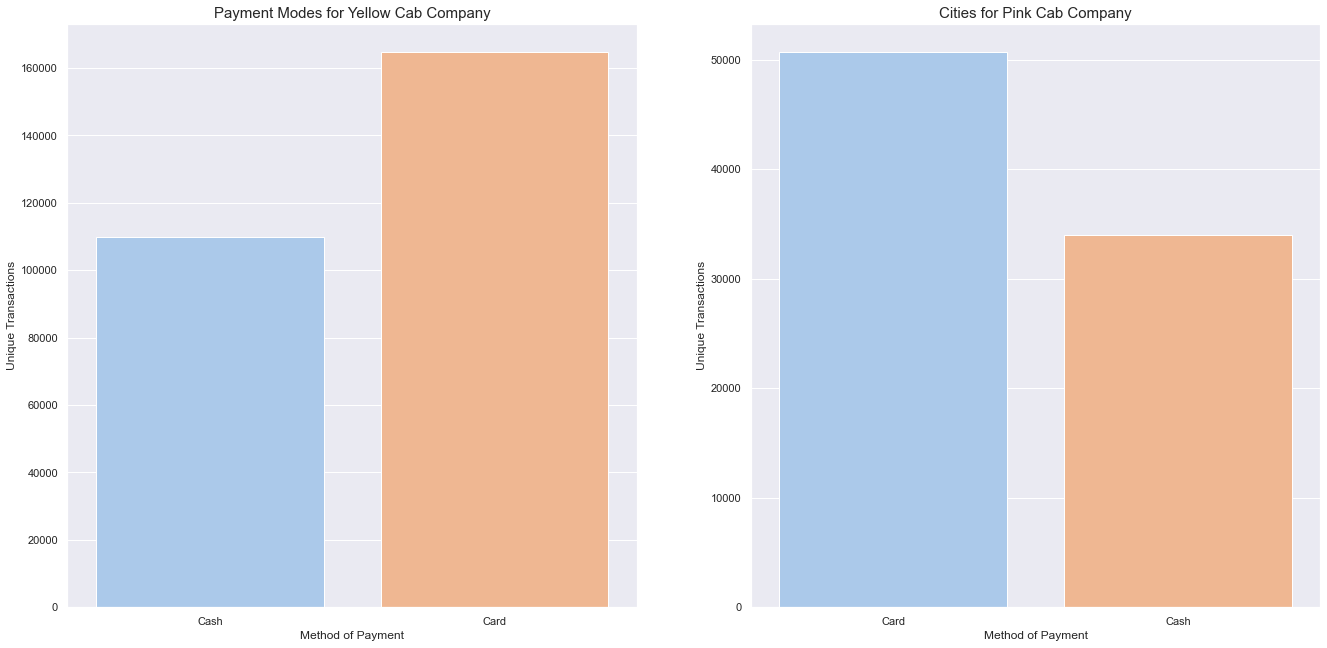

In [125]:
# Title for Payment Method graphs
title_all_graphs = "Payment Modes for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 10))

# Yellow Cab Company Payment Mode (bar plot)
sns.countplot(ax = ax0, data = yellow_cab_df, x = 'Payment_Mode')
ax0.set_title("Payment Modes for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Method of Payment")
ax0.set_ylabel("Unique Transactions")

# Pink Cab Company Payment Mode (bar plot)
sns.countplot(ax = ax1, data = pink_cab_df, x = 'Payment_Mode')
ax1.set_title("Cities for Pink Cab Company", fontsize = 15)
ax1.set_xlabel("Method of Payment")
ax1.set_ylabel("Unique Transactions");

* For both comapnies, it is apparent that the most popular payment method is by card. 
* This is likely due to more expensive fares requiring high amounts of cash that most customers do not feel comfortable carrying.

                                        Payment Modes for Yellow & Pink Cab Companies:                                       
                                               _______________________________                                               


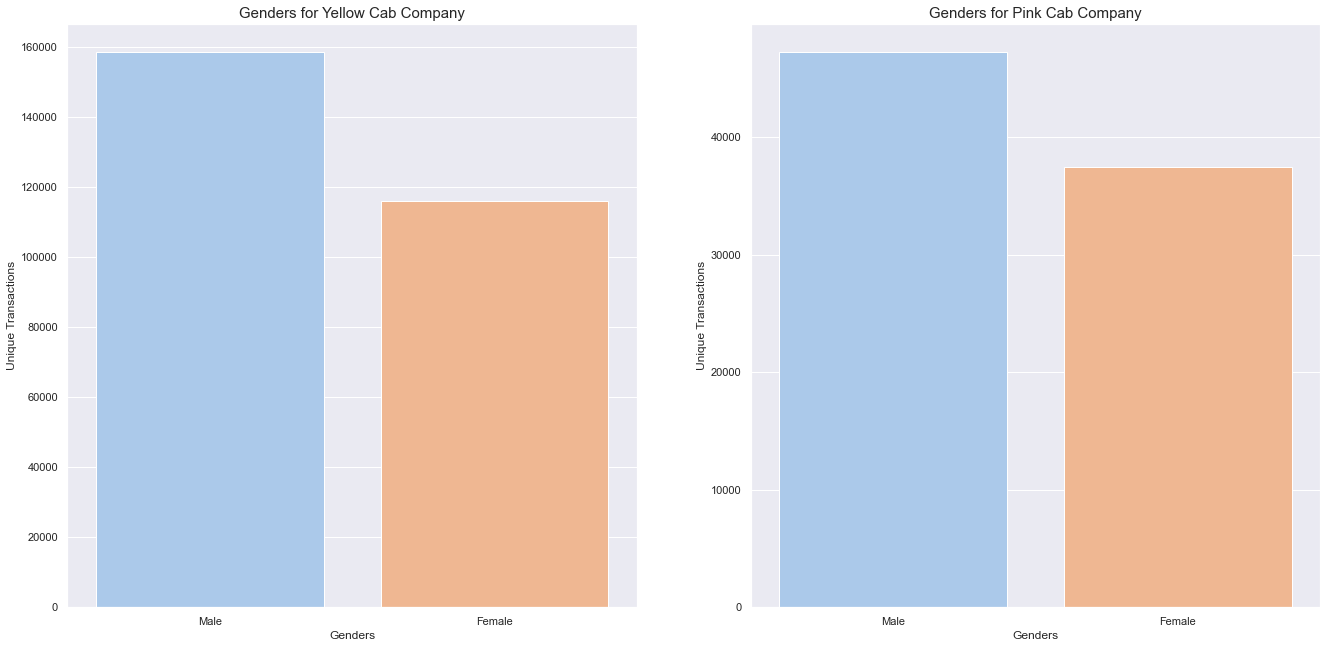

In [126]:
# Title for Gender graphs
title_all_graphs = "Payment Modes for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 10))

# Yellow Cab Company Genders (bar plot)
sns.countplot(ax = ax0, data = yellow_cab_df, x = 'Gender')
ax0.set_title("Genders for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Genders")
ax0.set_ylabel("Unique Transactions")

# Pink Cab Company Genders (bar plot)
sns.countplot(ax = ax1, data = pink_cab_df, x = 'Gender')
ax1.set_title("Genders for Pink Cab Company", fontsize = 15)
ax1.set_xlabel("Genders")
ax1.set_ylabel("Unique Transactions");

* For both companies, it is apparent that males prefer to take either of the cab companies more than females.
* It seems that in th Pink Cab Company, the proportion of females to males is much closer than that of the Yellow Cab Company, where the males are proportionately much larger than female riders.

                                     Kilometers Traveled for Yellow & Pink Cab Companies:                                    
                                               _______________________________                                               


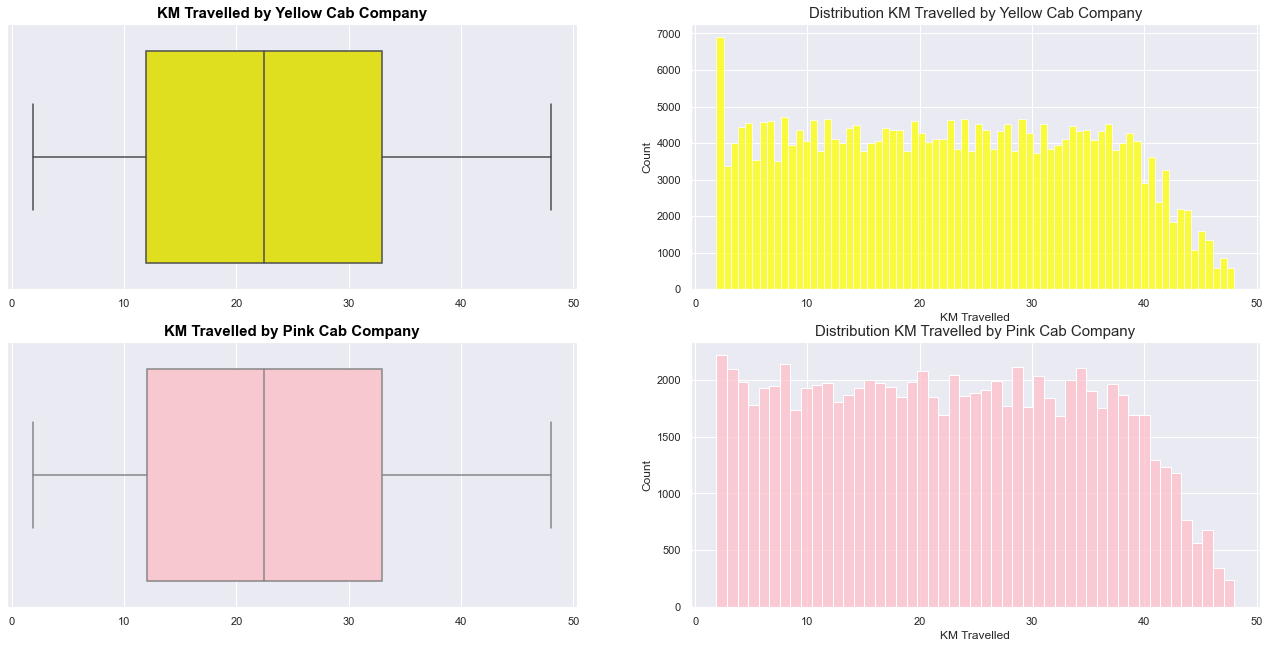

In [127]:
# Title for KM Travelled graphs
title_all_graphs = "Kilometers Traveled for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plots for Kilometers feature
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (20, 10))

# KM_Travelled by Yellow Cab Company (box plot)
sns.boxplot(ax = ax0, data = yellow_cab_df, x = 'KM_Travelled', color = 'yellow')
ax0.set_title('KM Travelled by Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# KM_Travelled by Yellow Cab Company (Histogram)
sns.histplot(ax = ax1, data = yellow_cab_df, x = 'KM_Travelled', color = 'yellow')
ax1.set_title("Distribution KM Travelled by Yellow Cab Company", fontsize = 15)
ax1.set_xlabel("KM Travelled")
ax1.set_ylabel("Count");

# KM_Travelled by Pink Cab Company (box plot)
sns.boxplot(ax = ax2, data = pink_cab_df, x = 'KM_Travelled', color = 'pink')
ax2.set_title('KM Travelled by Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# KM_Travelled by Pink Cab Company (Histogram)
sns.histplot(ax = ax3, data = pink_cab_df, x = 'KM_Travelled', color = 'pink')
ax3.set_title("Distribution KM Travelled by Pink Cab Company", fontsize = 15)
ax3.set_xlabel("KM Travelled")
ax3.set_ylabel("Count");

* For both cab companies, the range of traveling in KM per ride is approximately between ~2km and ~49km.
* The distirbutions appear to be very identical for the two companies with no outliers present in either company.
* However, the Yellow Cab Company has completed a lot more cab rides that are around or under ~4km when compared to other travel ranges for both companies.

                                      Price ($) Charged for Yellow & Pink Cab Companies:                                     
                                               _______________________________                                               


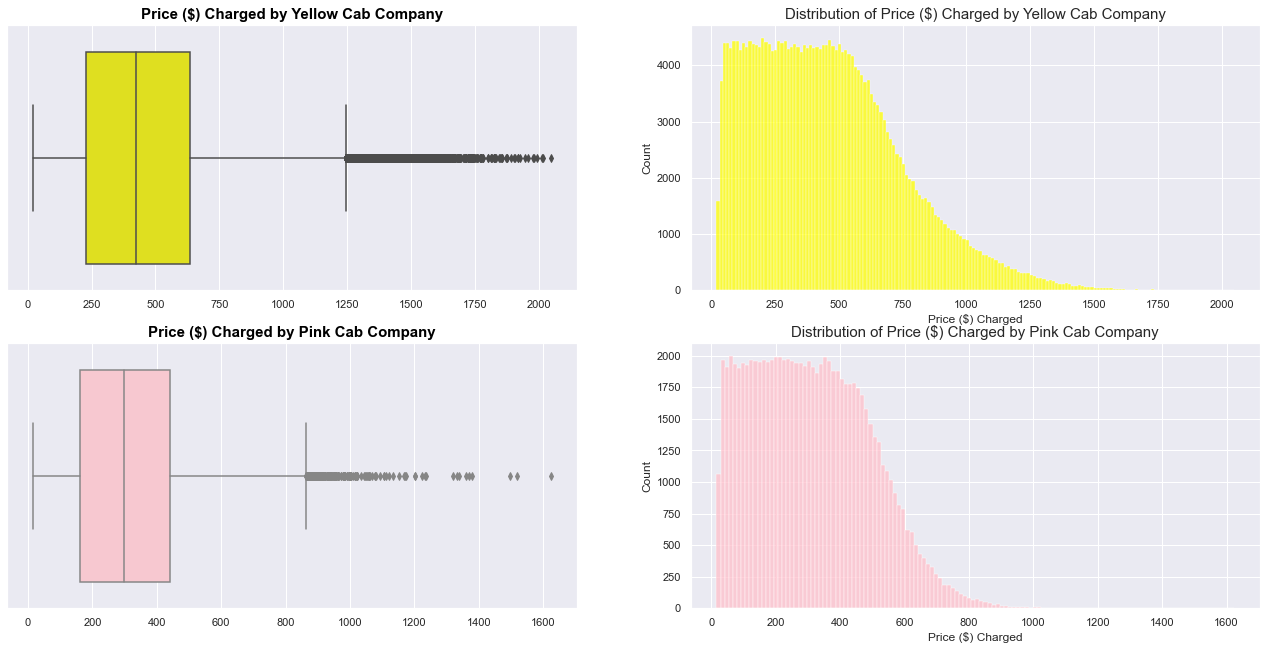

In [128]:
# Title for Price graphs
title_all_graphs = "Price ($) Charged for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plots for Price feature
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (20, 10))

# Price Charged by Yellow Cab Company (box plot)
sns.boxplot(ax = ax0, data = yellow_cab_df, x = 'Price_Charged', color = 'yellow')
ax0.set_title('Price ($) Charged by Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Price Charged by Yellow Cab Company (Histogram)
sns.histplot(ax = ax1, data = yellow_cab_df, x = 'Price_Charged', color = 'yellow')
ax1.set_title("Distribution of Price ($) Charged by Yellow Cab Company", fontsize = 15)
ax1.set_xlabel("Price ($) Charged")
ax1.set_ylabel("Count");

# Price Charged by Pink Cab Company (box plot)
sns.boxplot(ax = ax2, data = pink_cab_df, x = 'Price_Charged', color = 'pink')
ax2.set_title('Price ($) Charged by Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Price Charged by Pink Cab Company (Histogram)
sns.histplot(ax = ax3, data = pink_cab_df, x = 'Price_Charged', color = 'pink')
ax3.set_title("Distribution of Price ($) Charged by Pink Cab Company", fontsize = 15)
ax3.set_xlabel("Price ($) Charged")
ax3.set_ylabel("Count");

* The Yellow Cab Company has a larger range of prices with a much larger range of high prices (past upper bound) when compared to the Pink Cab Company.
* Overall, the Yellow Cab Company has charged more money than the Pink Cab Company. Making it seem more profitable. We will have to check the cost and margins. 

                                      Cost ($) of Trip for Yellow & Pink Cab Companies:                                      
                                               _______________________________                                               


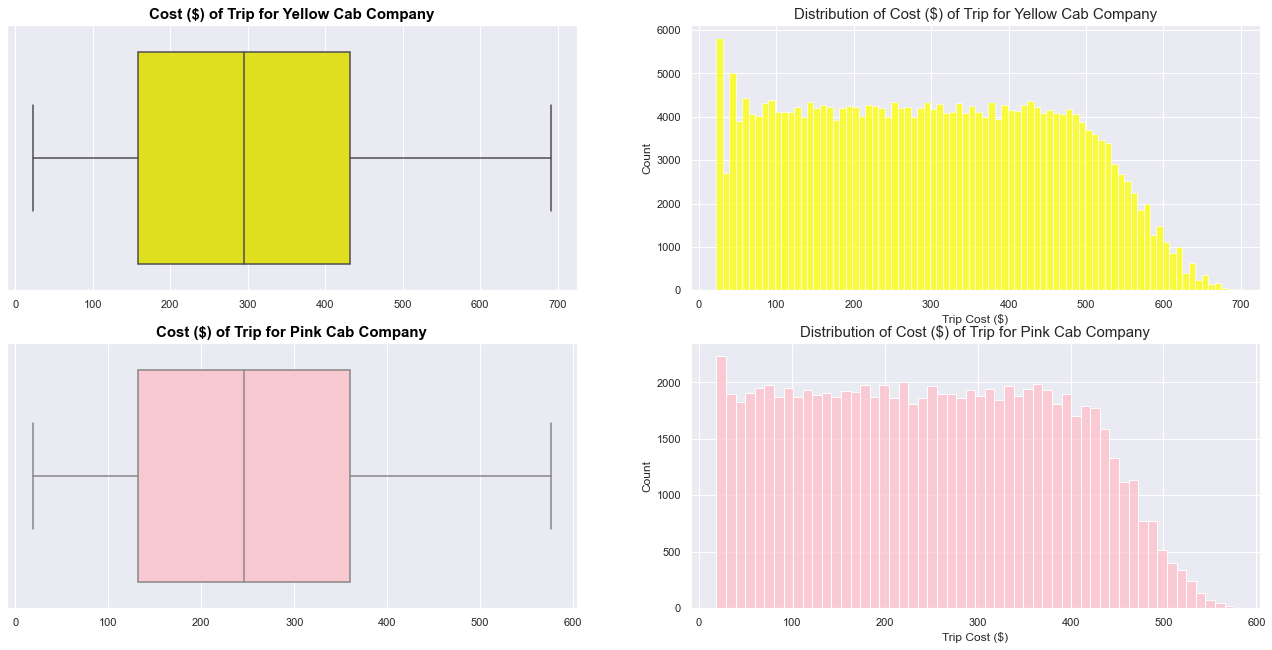

In [129]:
# Title for Trip Cost graphs
title_all_graphs = "Cost ($) of Trip for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plots for the Cost feature
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (20, 10))

# Cost of Trip by Yellow Cab Company (box plot)
sns.boxplot(ax = ax0, data = yellow_cab_df, x = 'Cost_of_Trip', color = 'yellow')
ax0.set_title('Cost ($) of Trip for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Cost of Trip by Yellow Cab Company (Histogram)
sns.histplot(ax = ax1, data = yellow_cab_df, x = 'Cost_of_Trip', color = 'yellow')
ax1.set_title("Distribution of Cost ($) of Trip for Yellow Cab Company", fontsize = 15)
ax1.set_xlabel("Trip Cost ($)")
ax1.set_ylabel("Count");

# Cost of Trip by Pink Cab Company (box plot)
sns.boxplot(ax = ax2, data = pink_cab_df, x = 'Cost_of_Trip', color = 'pink')
ax2.set_title('Cost ($) of Trip for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Cost of Trip by Pink Cab Company (Histogram)
sns.histplot(ax = ax3, data = pink_cab_df, x = 'Cost_of_Trip', color = 'pink')
ax3.set_title("Distribution of Cost ($) of Trip for Pink Cab Company", fontsize = 15)
ax3.set_xlabel("Trip Cost ($)")
ax3.set_ylabel("Count");

* The Cost of trips are relatively identical for both companies. 
* The Yellow Cab Company has completed some trips that cost more than the Pink Cab Company. It is possible that these are longer trips or the Yellow Cab Company has more expensive and larger vehicles for transportation. We will explore this later and in more depth.

                                      Age of Customers for Yellow & Pink Cab Companies:                                      
                                               _______________________________                                               


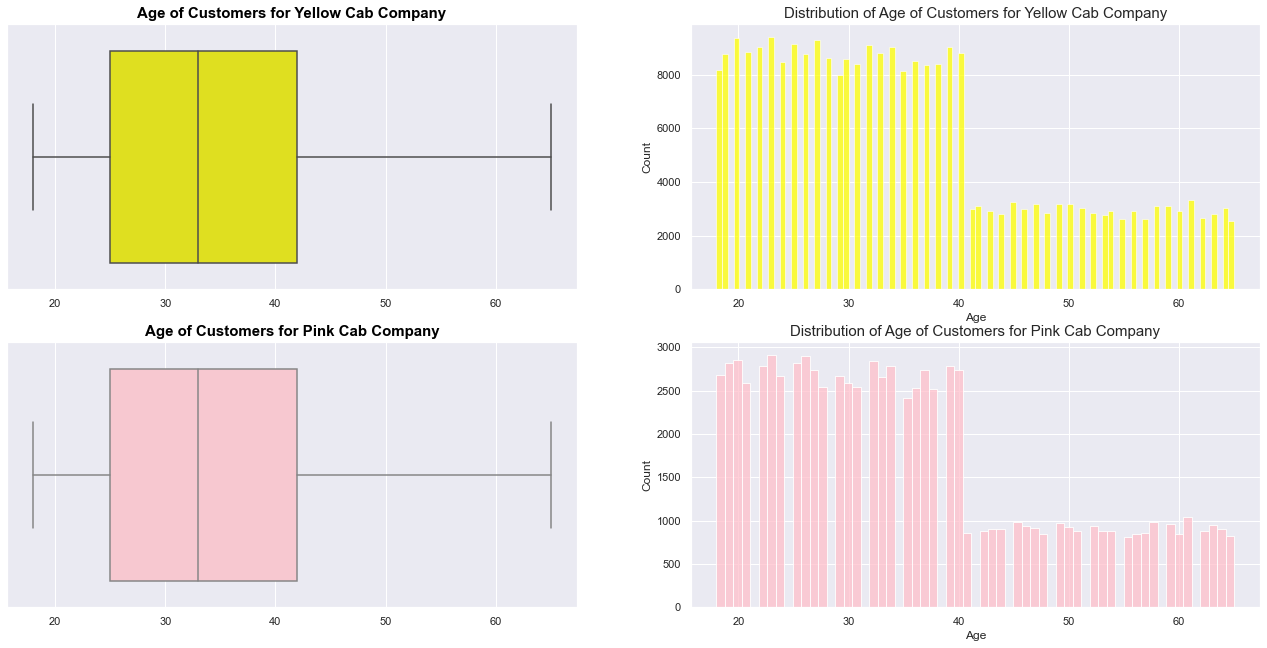

In [130]:
# Title for Age graphs
title_all_graphs = "Age of Customers for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plots for Age feature
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (20, 10))

# Customer Ages for Yellow Cab Company (box plot)
sns.boxplot(ax = ax0, data = yellow_cab_df, x = 'Age', color = 'yellow')
ax0.set_title('Age of Customers for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Customer Ages for Yellow Cab Company (Histogram)
sns.histplot(ax = ax1, data = yellow_cab_df, x = 'Age', color = 'yellow')
ax1.set_title("Distribution of Age of Customers for Yellow Cab Company", fontsize = 15)
ax1.set_xlabel("Age")
ax1.set_ylabel("Count");

# Customer Ages for Pink Cab Company (box plot)
sns.boxplot(ax = ax2, data = pink_cab_df, x = 'Age', color = 'pink')
ax2.set_title('Age of Customers for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Customer Ages for Pink Cab Company (Histogram)
sns.histplot(ax = ax3, data = pink_cab_df, x = 'Age', color = 'pink')
ax3.set_title("Distribution of Age of Customers for Pink Cab Company", fontsize = 15)
ax3.set_xlabel("Age")
ax3.set_ylabel("Count");

* For both companies, most customers are in their late-20s to early-40s in terms of age.
* Some cab riders are over 50+ but hardly any are below 20.
* These numbers make sense because seniors and young adults are unlikely to travel in cabs for safety reasons. 
* Additionally, adults in their 20s and 40s are likely working and have more control/freedom with money. 

                                   Income ($) of Customers for Yellow & Pink Cab Companies:                                  
                                               _______________________________                                               


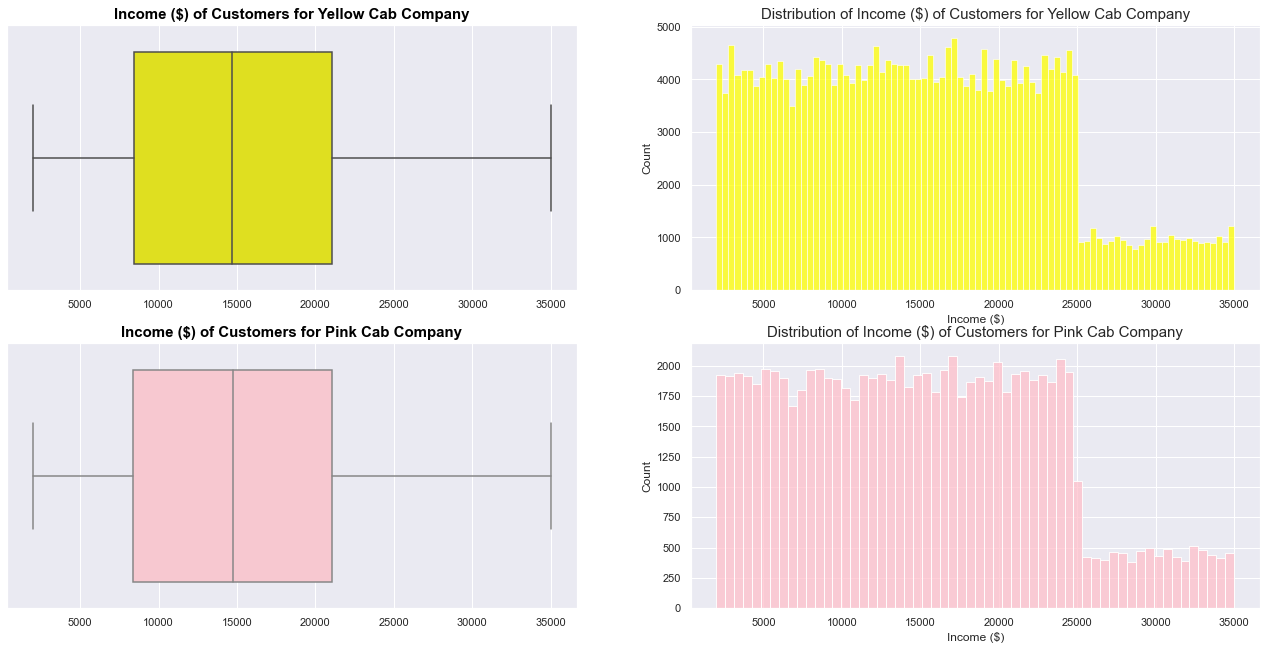

In [131]:
# Title for Income graphs
title_all_graphs = "Income ($) of Customers for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plots for Income feature
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (20, 10))

# Income of Customers for Yellow Cab Company (box plot)
sns.boxplot(ax = ax0, data = yellow_cab_df, x = 'Income_(USD/Month)', color = 'yellow')
ax0.set_title('Income ($) of Customers for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Income of Customers for Yellow Cab Company (Histogram)
sns.histplot(ax = ax1, data = yellow_cab_df, x = 'Income_(USD/Month)', color = 'yellow')
ax1.set_title("Distribution of Income ($) of Customers for Yellow Cab Company", fontsize = 15)
ax1.set_xlabel("Income ($)")
ax1.set_ylabel("Count");

# Income of Customers for Pink Cab Company (box plot)
sns.boxplot(ax = ax2, data = pink_cab_df, x = 'Income_(USD/Month)', color = 'pink')
ax2.set_title('Income ($) of Customers for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Income of Customers for Pink Cab Company (Histogram)
sns.histplot(ax = ax3, data = pink_cab_df, x = 'Income_(USD/Month)', color = 'pink')
ax3.set_title("Distribution of Income ($) of Customers for Pink Cab Company", fontsize = 15)
ax3.set_xlabel("Income ($)")
ax3.set_ylabel("Count");

* Almost all the customers for both cab companies are earning well with incomes for a majority of customers ranging from ~$8k to $22k per month. 
* The distribution of income for both cab companies are identical, so there is no disparity between income classes for either of the cab companies. 
* It seems that based on this dataset, cab users prefer to choose the Yellow Cab Company regardless of income.

#### 8.2 Multivariate Data Visualizations
Now we will compare the relationship between the features and our target variable, the profit/margins per transaction. 

                                    City vs. Profits ($) for Yellow & Pink Cab Companies:                                    
                                               _______________________________                                               


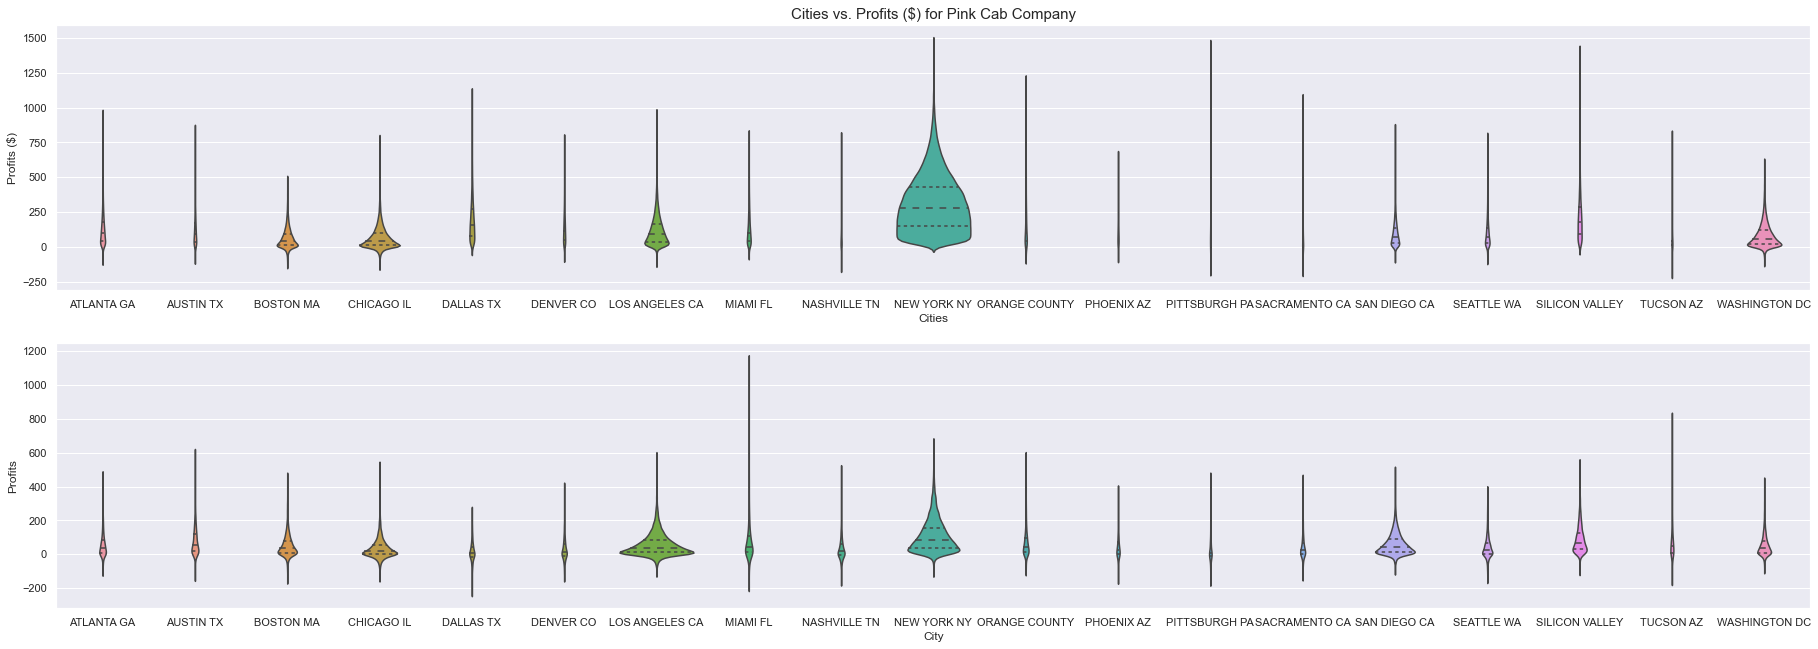

In [132]:
# Title for City vs. Profits Violinplots
title_all_graphs = "City vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Violin plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (28, 10))

# Cities vs. Profits Violin Plot for Yellow Cab Company
sns.violinplot(ax = ax0, x = yellow_cab_df['City'], y = yellow_cab_df['Profits'], data = yellow_cab_df, 
               scale = 'count', inner = 'quartile')
ax0.set_title("Cities vs. Profits ($) for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Cities")
ax0.set_ylabel("Profits ($)");

# Cities vs. Profits Violin Plot for Pink Cab Company
sns.violinplot(ax = ax1, x = pink_cab_df['City'], y = pink_cab_df['Profits'], data = pink_cab_df, 
               scale = 'count', inner = 'quartile')
ax0.set_title("Cities vs. Profits ($) for Pink Cab Company", fontsize = 15)
ax0.set_xlabel("Cities")
ax0.set_ylabel("Profits ($)");


       Payment Mode vs. Profits ($) for Yellow & Pink Cab Companies:       
                      _______________________________                      


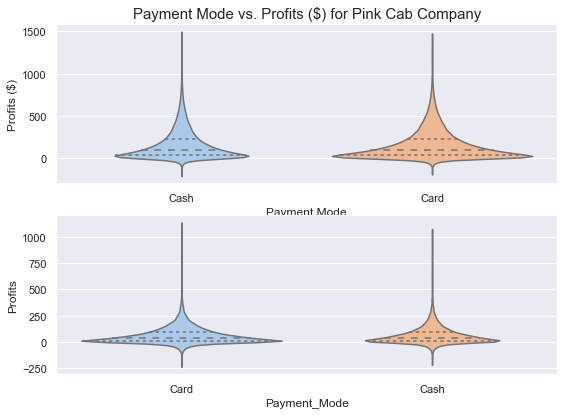

In [133]:
# Title for Payment Mode vs. Profits Violin Plots
title_all_graphs = "Payment Mode vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(75)
underline = "_______________________________"
centered_underline = underline.center(75)
print(centered_title)
print(centered_underline)

# Violin plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (8, 6))

# Payment Mode vs. Profits Violin Plot for Yellow Cab Company
sns.violinplot(ax = ax0, x = yellow_cab_df['Payment_Mode'], y = yellow_cab_df['Profits'], data = yellow_cab_df, 
               scale = 'count', inner = 'quartile')
ax0.set_title("Payment Mode vs. Profits ($) for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Payment Mode")
ax0.set_ylabel("Profits ($)");

# Payment Mode vs. Profits Violin Plot for Pink Cab Company
sns.violinplot(ax = ax1, x = pink_cab_df['Payment_Mode'], y = pink_cab_df['Profits'], data = pink_cab_df, 
               scale = 'count', inner = 'quartile')
ax0.set_title("Payment Mode vs. Profits ($) for Pink Cab Company", fontsize = 15)
ax0.set_xlabel("Payment Mode")
ax0.set_ylabel("Profits ($)");


          Gender vs. Profits ($) for Yellow & Pink Cab Companies:          
                      _______________________________                      


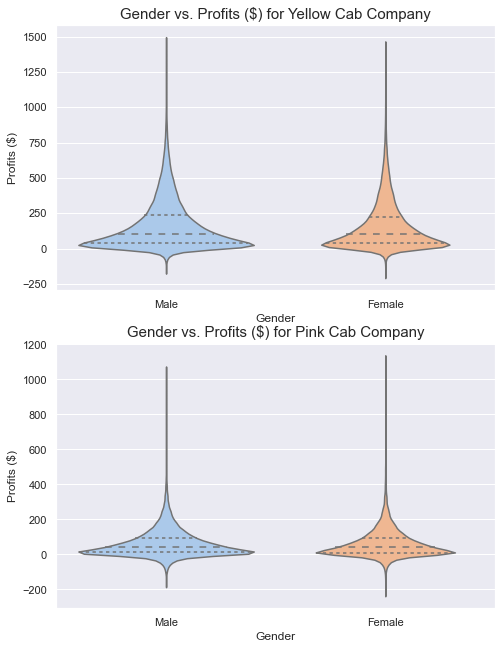

In [134]:
# Title for Gender vs. Profits Violin Plots
title_all_graphs = "Gender vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(75)
underline = "_______________________________"
centered_underline = underline.center(75)
print(centered_title)
print(centered_underline)

# Violin plots for the categorical features
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (7, 10))

# Gender vs. Profits Violin Plot for Yellow Cab Company
sns.violinplot(ax = ax0, x = yellow_cab_df['Gender'], y = yellow_cab_df['Profits'], data = yellow_cab_df, 
               scale = 'count', inner = 'quartile')
ax0.set_title("Gender vs. Profits ($) for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Gender")
ax0.set_ylabel("Profits ($)");

# Gender vs. Profits Violin Plot for Pink Cab Company
sns.violinplot(ax = ax1, x = pink_cab_df['Gender'], y = pink_cab_df['Profits'], data = pink_cab_df, 
               scale = 'count', inner = 'quartile')
ax1.set_title("Gender vs. Profits ($) for Pink Cab Company", fontsize = 15)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Profits ($)");

                                KM Travelled vs. Profits ($) for Yellow & Pink Cab Companies:                                
                                               _______________________________                                               


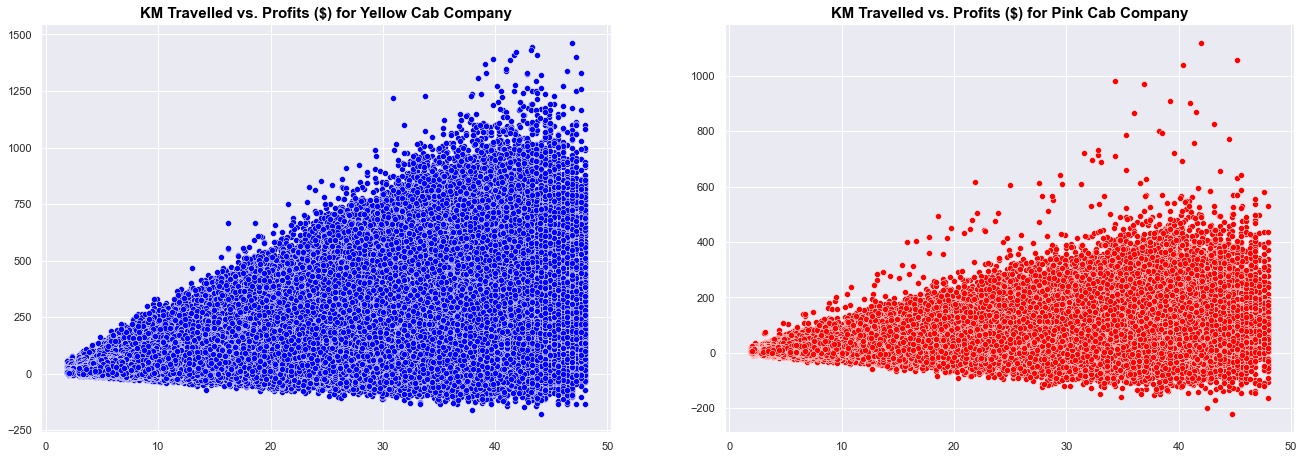

In [135]:
# Title for KM Travelled vs. Profits Scatter Plots
title_all_graphs = "KM Travelled vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Scatter plots for the continuous features
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 7))

# Income of Customers for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax0, data = yellow_cab_df, x = 'KM_Travelled', y = 'Profits', color = 'blue')
ax0.set_title('KM Travelled vs. Profits ($) for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Income of Customers for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax1, data = pink_cab_df, x = 'KM_Travelled', y = 'Profits', color = 'red')
ax1.set_title('KM Travelled vs. Profits ($) for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

                              Price ($) Charged vs. Profits ($) for Yellow & Pink Cab Companies:                             
                                               _______________________________                                               


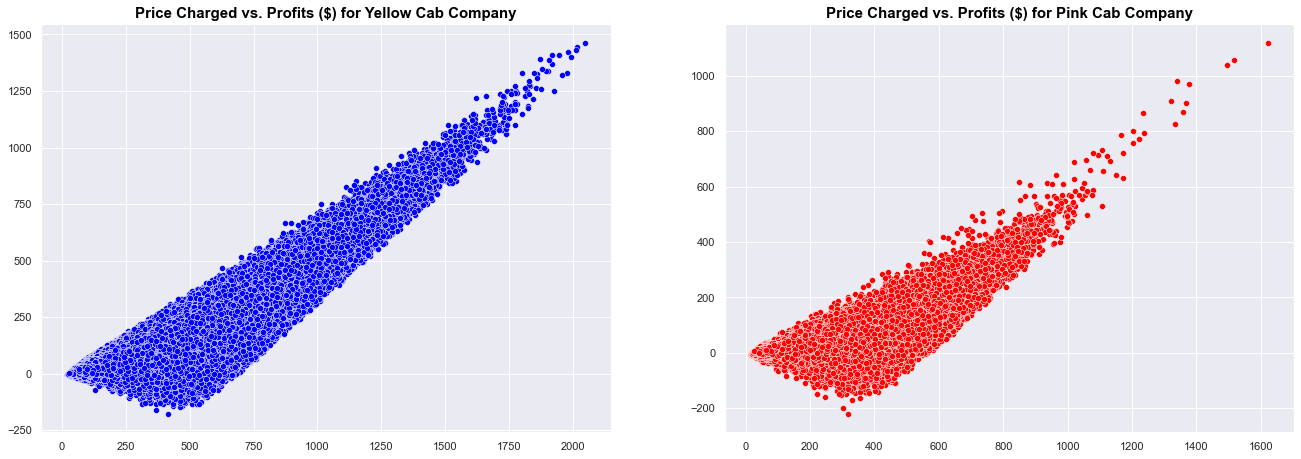

In [136]:
# Title for Price Charged vs. Profits Scatter Plots
title_all_graphs = "Price ($) Charged vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Scatter plots for the continuous features
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 7))

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax0, data = yellow_cab_df, x = 'Price_Charged', y = 'Profits', color = 'blue')
ax0.set_title('Price Charged vs. Profits ($) for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax1, data = pink_cab_df, x = 'Price_Charged', y = 'Profits', color = 'red')
ax1.set_title('Price Charged vs. Profits ($) for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

                                     Age vs. Profits ($) for Yellow & Pink Cab Companies:                                    
                                               _______________________________                                               


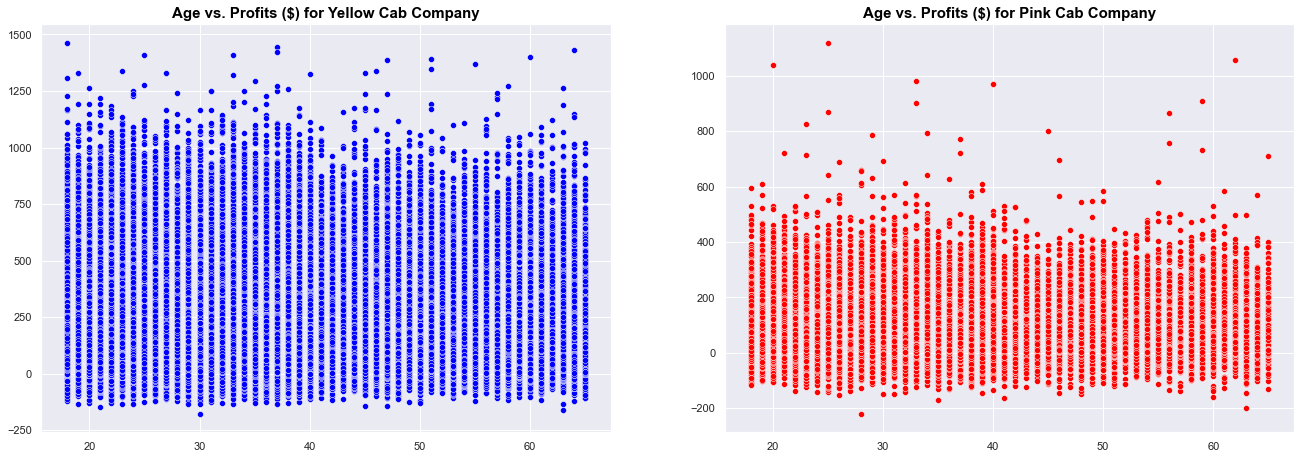

In [137]:
# Title for Age vs. Profits Scatter Plots
title_all_graphs = "Age vs. Profits ($) for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Scatter plots for the continuous features
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 7))

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax0, data = yellow_cab_df, x = 'Age', y = 'Profits', color = 'blue')
ax0.set_title('Age vs. Profits ($) for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.scatterplot(ax = ax1, data = pink_cab_df, x = 'Age', y = 'Profits', color = 'red')
ax1.set_title('Age vs. Profits ($) for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

### 9. Data Exploration
Now, we will seek to answer a few questions about the cab companies, and the information provided per transaction for both the companies. Based off of the data visualizations and inspection of the target earlier, it seems that the **Yellow Cab** company is the better company to invest in because of the volume of customers it has, and higher overall **average profit (margins) of ~$160**, which is almost **100 dollars more** than the average margins compared of the **Pink Cab** company. 

The questions we seek to answer with the data on these cab companies in the U.S.A. are as follows:
1. *Is there any seasonality in the number of customers using the cab service?*
2. *How have companies performed across the years from 2016 to 2018?*
3. *Which company has maximum cab users at a particular time period?*
4. *What is the relationship between distance traveled in kilometers and profits earned for each city? Does profit increase for longer cab rides?*
5. *What's the most popular payment method by gender? Are card payments more expensive than cash payments?*
6. *Which company is has more negative margins? What might be causing these?*

##### 1. Is there any seasonality in the number of customers using the cab service?

In [138]:
# Transactions per month for Yellow Cab Company
yellow_cab_customers_per_months = yellow_cab_df.groupby('Month').Transaction_ID.count()
yellow_cab_customers_per_month_df = pd.DataFrame(yellow_cab_customers_per_months)
yellow_cab_customers_per_month_df

,Transaction_ID
Month,
1,18117
2,14932
3,17423
4,17351
5,18741
6,18836
7,21086
8,23584
9,27201


In [139]:
# Transactions per month for the Pink Cab Company
pink_cab_customers_per_months = pink_cab_df.groupby('Month').Transaction_ID.count()
pink_cab_customers_per_month_df = pd.DataFrame(pink_cab_customers_per_months)
pink_cab_customers_per_month_df

,Transaction_ID
Month,
1,5057
2,3375
3,4223
4,4083
5,4960
6,5877
7,6590
8,7739
9,9658


                                  Number of Customers per Month Yellow & Pink Cab Companies:                                 
                                               _______________________________                                               


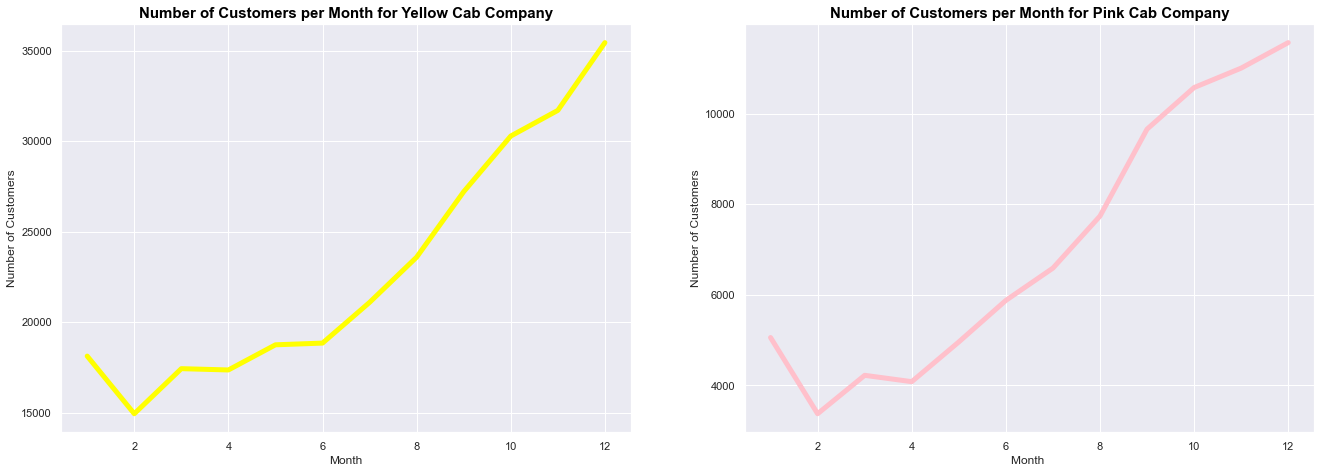

In [140]:
# Title for Month vs. Customers Scatter Plots
title_all_graphs = "Number of Customers per Month Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Line Plots plots figure
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (20, 7))

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.lineplot(ax = ax0, data = yellow_cab_customers_per_month_df, x = 'Month', y = 'Transaction_ID', color = 'Yellow', estimator = None, linewidth = 5);
ax0.set_title('Number of Customers per Month for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of Customers")

# Price Charged vs. Profits for Yellow Cab Company (box plot)
sns.lineplot(ax = ax1, data = pink_cab_customers_per_month_df, x = 'Month', y = 'Transaction_ID', color = 'Pink', estimator = None, linewidth = 5);
ax1.set_title('Number of Customers per Month for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Month ")
ax1.set_ylabel("Number of Customers");

* Both companies perform really well in the fall/winter seasons. 
* This is because of the cooler weather during these months, which discourages people from walking, taking public transit or biking to destinations. 
* Additionally, although January and February are cold months in the U.S.A., it seems the cab companies do not recieve much business during these times of the year likely due to a lack of traveling throughout the peak winter seasons (inclimate weather). 
* The **Yellow Cab Company is drastically outperforming the Pink Cab Company** regardless of the month/season during the year.

##### 2. How have companies performed across the years from 2016 to 2018?

In [141]:
# Transactions per year for Yellow Cab Company
yellow_cab_customers_per_year = yellow_cab_df.groupby('Year').Transaction_ID.count()
yellow_cab_customers_per_year_df = pd.DataFrame(yellow_cab_customers_per_year)
yellow_cab_customers_per_year_df

,Transaction_ID
Year,
2016,82239
2017,98189
2018,94253


In [142]:
# Transactions per year for Pink Cab Company
pink_cab_customers_per_year = pink_cab_df.groupby('Year').Transaction_ID.count()
pink_cab_customers_per_year_df = pd.DataFrame(pink_cab_customers_per_year)
pink_cab_customers_per_year_df

,Transaction_ID
Year,
2016,25080
2017,30321
2018,29310


                             Customers per Year for Yellow & Pink Cab Companies:                              
                                       _______________________________                                        


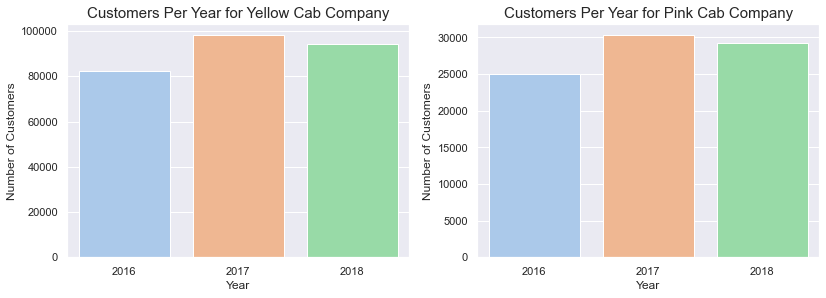

In [143]:
# Title for Customers per Year graphs
title_all_graphs = "Customers per Year for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(110)
underline = "_______________________________"
centered_underline = underline.center(110)
print(centered_title)
print(centered_underline)

# Bar plots for figure
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (12, 4))

# Yellow Cab Company Yearly Customers (bar plot)
sns.countplot(ax = ax0, data = yellow_cab_df, x = 'Year')
ax0.set_title("Customers Per Year for Yellow Cab Company", fontsize = 15)
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of Customers")

# Pink Cab Company Yearly Customers (bar plot)
sns.countplot(ax = ax1, data = pink_cab_df, x = 'Year')
ax1.set_title("Customers Per Year for Pink Cab Company", fontsize = 15)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Customers");

* For both companies, 2017 was their best year in terms of total number of customers. 
* Overall, there seems to be an increase in customers from 2016 to 2018.


Let's compare the profits of the companies based on the year to verify if 2017 was the most profitable year given that there are transactions where the profits were negative. 

In [144]:
# Transactions per year for Pink Cab Company
pink_cab_yearly_profits = pink_cab_df.groupby('Year').agg({'Profits': 'mean'})
pink_cab_yearly_profits

,Profits
Year,
2016,68.321819
2017,67.070839
2018,53.229689


In [145]:
# Transactions per year for Yellow Cab Company
yellow_cab_yearly_profits = yellow_cab_df.groupby('Year').agg({'Profits': 'mean'})
yellow_cab_yearly_profits

,Profits
Year,
2016,169.347821
2017,168.817057
2018,143.416122


* For both, the Yellow Cab Company and Pink Cab Company, 2016 was the most profitable year. 
* Despite 2017 yielding the most customers for both companies, it was as profitable as the previous year. The cost of the trip is more than the company is charging. 
* In 2018, both companies seem to be losing out on their average yearly profits because depsite having more customers in 2018 than in 2016, the profits are noticeably lower.
* Both cab companies seem to be on a **decline** when it comes retaining profits. 

###### 3. Which company has maximum cab users at a particular time period?

In [146]:
# Number of cab users per month by year for Pink Cab Company
monthly_pink_cab_transactions_df = pink_cab_df.groupby(['Year', 'Month']).agg({'Transaction_ID': 'count'})
monthly_pink_cab_transactions_df

Transaction_ID
Year Month                
2016 1                 927
     2                1050
     3                1231
     4                1240
     5                1567
     6                1730
     7                2125
     8                2272
     9                2854
     10               3334
     11               3229
     12               3521
2017 1                1734
     2                1195
     3                1503
     4                1487
     5                1724
     6                2083
     7                2359
     8                2766
     9                3537
     10               3807
     11               3879
     12               4247
2018 1                2396
     2                1130
     3                1489
     4                1356
     5                1669
     6                2064
     7                2106
     8                2701
     9                3267
     10               3435
     11               3897
     12               3800

In [147]:
# Maximum number of cab users between 2016-2018 for Pink Cab Company
monthly_pink_cab_transactions_df.max()

Transaction_ID    4247
dtype: int64

In [148]:
# Number of cab users per month by year for Yellow Cab Company
monthly_yellow_cab_transactions_df = yellow_cab_df.groupby(['Year', 'Month']).agg({'Transaction_ID': 'count'})
monthly_yellow_cab_transactions_df

Transaction_ID
Year Month                
2016 1                3719
     2                4674
     3                5146
     4                5360
     5                5967
     6                5667
     7                6814
     8                6918
     9                8130
     10               9697
     11               9320
     12              10827
2017 1                6454
     2                5358
     3                6219
     4                6372
     5                6531
     6                6613
     7                7438
     8                8439
     9                9922
     10              10852
     11              11145
     12              12846
2018 1                7944
     2                4900
     3                6058
     4                5619
     5                6243
     6                6556
     7                6834
     8                8227
     9                9149
     10               9727
     11              11230
     12              11766

In [149]:
# Maximum number of cab users between 2016-2018 for Pink Cab Company
monthly_yellow_cab_transactions_df.max()

Transaction_ID    12846
dtype: int64

* The Yellow Cab Company had 12846 cab users during December of 2017, which is the most amount of Cab Users by eithe of the companies during a particular time. 
* The Pink Cab Company had 4247 cab users during December of 2017, which implies that December of 2017 was a the busiest month for both cab companies.

##### 4. What is the relationship between distance traveled in kilometers and profits earned for each city? Does profit increase for longer cab rides?

                            KM Travelled vs. Profits ($) by City for Yellow & Pink Cab Companies:                            
                                               _______________________________                                               


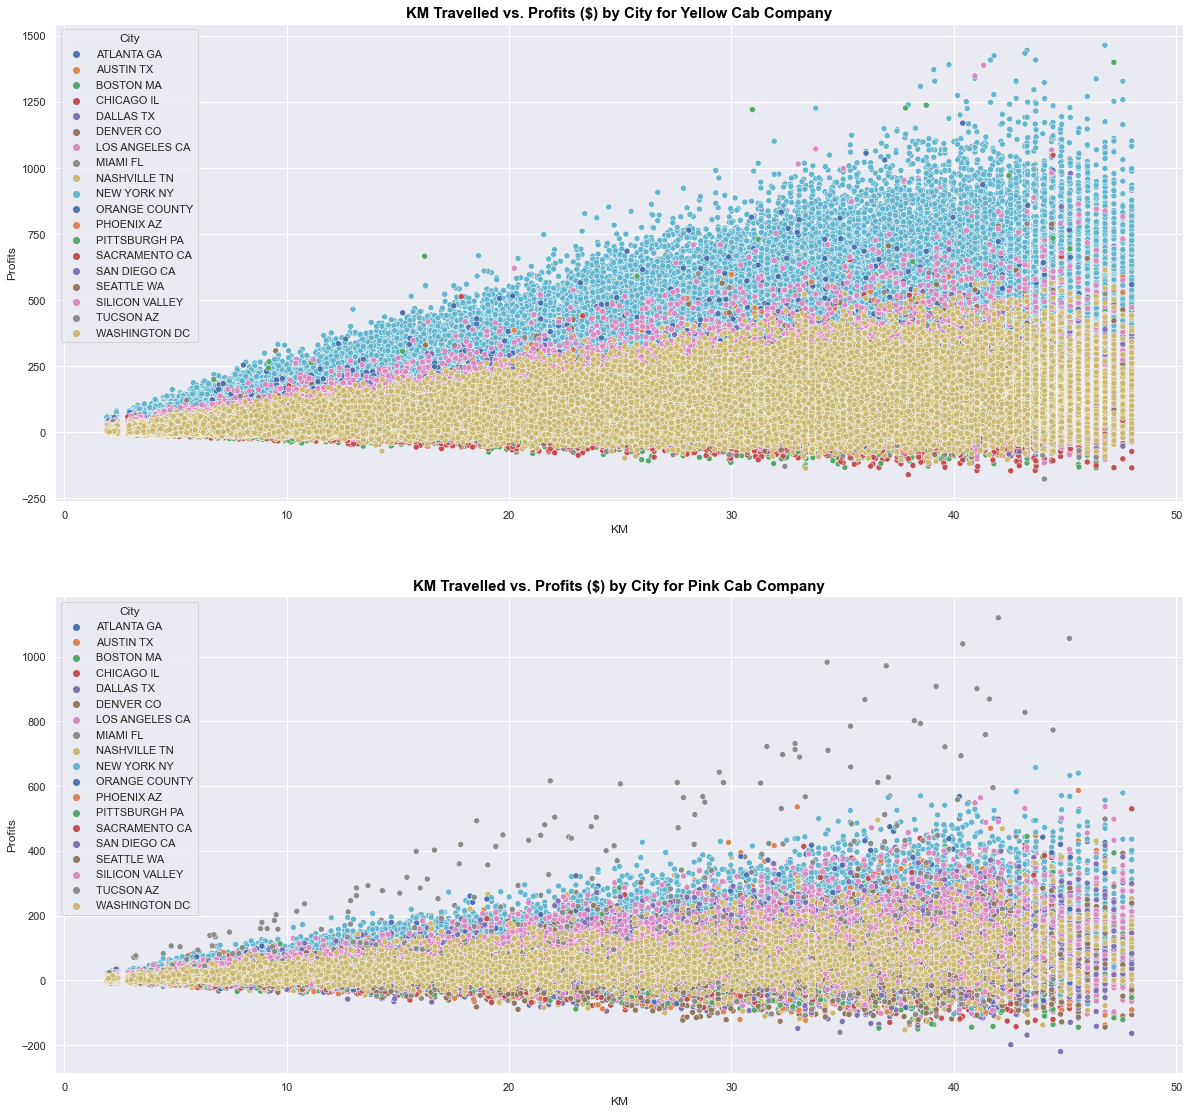

In [150]:
# Title for KM Travelled vs. Profits Scatter Plots
title_all_graphs = "KM Travelled vs. Profits ($) by City for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Scatter plots for the continuous features
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (18, 18))

# Income of Customers for Yellow Cab Company (scatter plot)
sns.scatterplot(ax = ax0, data = yellow_cab_df, x = 'KM_Travelled', y = 'Profits', hue = 'City', palette = 'deep')
ax0.set_title('KM Travelled vs. Profits ($) by City for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("KM")
ax0.set_ylabel("Profits")

# Income of Customers for Yellow Cab Company (scatter plot)
sns.scatterplot(ax = ax1, data = pink_cab_df, x = 'KM_Travelled', y = 'Profits', hue = 'City', palette = 'deep')
ax1.set_title('KM Travelled vs. Profits ($) by City for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("KM")
ax1.set_ylabel("Profits");

* For the Pink Cab Company, longer fairs with greater distance coverage yield substantially higher profits for Miami, FL. The distance traveled and profits for this city are linear with a steady increase in profit as distance of cab ride increases.
* For the Yellow Cab Company, longer fairs with greater distance coverage yield larger profits for New York, Boston, and Orange County. 
* For both cities, more distance traveled by a cab does not yield a larger profit for Sacramento, Washington, and Tucson. The profits seem to remain relatively stable with some decrease in profits as distance increases.

#####  5. What's the most popular payment method by gender? Are card payments more expensive than cash payments?

                                  Payment Methods by Gender for Yellow & Pink Cab Companies:                                 
                                               _______________________________                                               


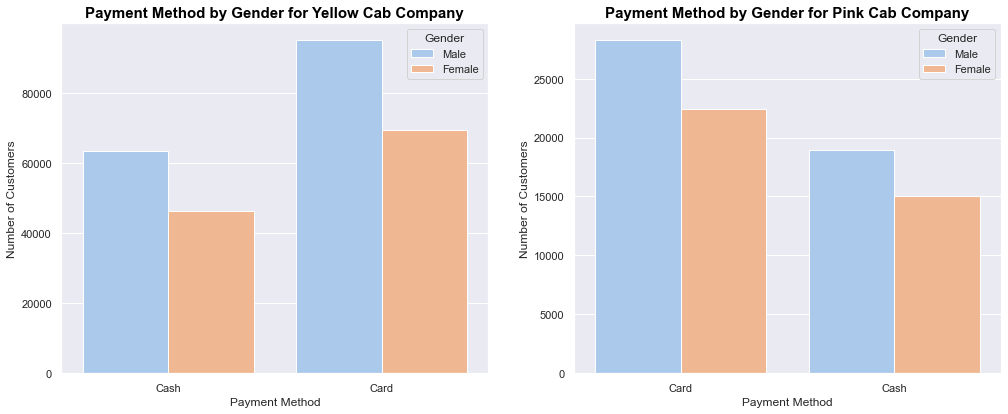

In [151]:
# Title for Payment Mode by Gender Plots 
title_all_graphs = "Payment Methods by Gender for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Figure for Bar Plots
fig, (ax0, ax1) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (15, 6))

# Payment Mode Bar Plot by Gender for Yellow Cab 
sns.countplot(ax = ax0, data = yellow_cab_df, x = 'Payment_Mode', hue = 'Gender');
ax0.set_title('Payment Method by Gender for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("Payment Method")
ax0.set_ylabel("Number of Customers");

# Payment Mode Bar Plot by Gender for Pink Cab
sns.countplot(ax = ax1, data = pink_cab_df, x = 'Payment_Mode', hue = 'Gender');
ax1.set_title('Payment Method by Gender for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Payment Method")
ax1.set_ylabel("Number of Customers");

Payment Methods by Gender for Yellow & Pink Cab Companies:
         _______________________________          


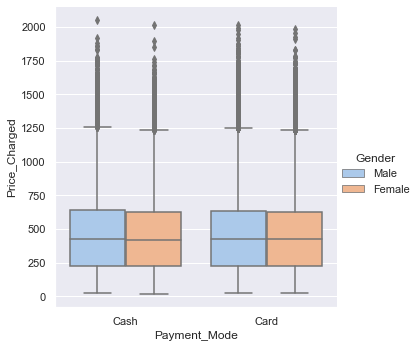

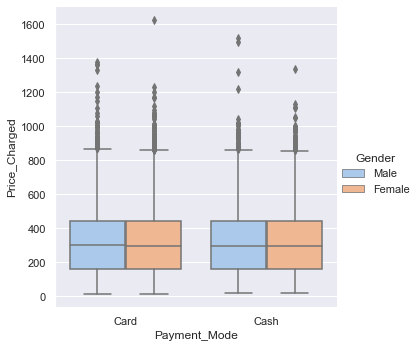

In [152]:
# Title for Payment Mode by Gender Plots 
title_all_graphs = "Payment Methods by Gender for Yellow & Pink Cab Companies:"
centered_title = title_all_graphs.center(50)
underline = "_______________________________"
centered_underline = underline.center(50)
print(centered_title)
print(centered_underline)

# Payment Mode vs. Price Charged Plot by Gender for Yellow Cab 
sns.catplot(ax = ax0, data = yellow_cab_df, x = 'Payment_Mode', y = 'Price_Charged', hue = 'Gender', kind = 'box');
ax0.set_title('Payment Method vs. Price ($) Charged by Gender for Yellow Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("Payment Method")
ax0.set_ylabel("Price ($) Price Charged");

# Payment Mode Bar vs. Price Charged by Gender for Pink Cab
sns.catplot(ax = ax1, data = pink_cab_df, x = 'Payment_Mode', y = 'Price_Charged', hue = 'Gender', kind = 'box');
ax1.set_title('Payment Method vs. Price ($) Charged by Gender for Pink Cab Company', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Payment Method")
ax1.set_ylabel("Price ($) Charged");

In [153]:
# Average Payment by Payment Method for Yellow Cab Company
avg_payment_mode_yellow_cab_df = yellow_cab_df.groupby(['Payment_Mode']).agg({'Price_Charged': ['mean', 'count']})
avg_payment_mode_yellow_cab_df

Price_Charged        
                      mean   count
Payment_Mode                      
Card            457.924979  164785
Cash            458.567368  109896

In [154]:
# Average Payment by Payment Method for Pink Cab Company
avg_payment_mode_pink_cab_df = pink_cab_df.groupby(['Payment_Mode']).agg({'Price_Charged': ['mean', 'count']})
avg_payment_mode_pink_cab_df

Price_Charged       
                      mean  count
Payment_Mode                     
Card            311.197319  50719
Cash            310.209299  33992

* The most popular payment method regardless of gender is by card although it is not by much surprisingly. Usually, it is preferred to pay higher amounts of fees by card as opposed to cash because of the convenience of not carrying a lot of cash. This explains why card payments are more popular regardless of gender.
* For the Pink Cab Company, card payments are on average 1 dollar more, which is insiginificant, but the there are over 17,000 more transactions paid with cards vs. cash. 
* For the Yellow Cab Company, card payments are on average 1 dollar less, which is also insignificant, but there are over 54,000 more transactions paid with cards vs. cash. 
* In general, both cab companies should be prepared to handle any payment method because the method a customer chooses to pay by is ambiguous.
* **Note:** Average price charged by the Yellow Cab Company is almost on average **$145 more** than the Pink Cab Company regardless of payment method.

##### 6. Which company has more negative profits (margins)? What might be causing lower profits (margins)?

In [179]:
# Exploring negative profits for the Yellow Cab Company
negative_profits_yellow_cab = yellow_cab_df[yellow_cab_df['Profits'] < 0]
negative_profits_yellow_cab = negative_profits_yellow_cab[['Transaction_ID', 'Profits', 'Year']]
print(negative_profits_yellow_cab.head(5))
print('The shape of the negative profits yellow cab company dataframe frame is: ' + str(negative_profits_yellow_cab.shape))
print('The mean of the negative profits yellow cab company dataframe is: ' + str(negative_profits_yellow_cab.Profits.mean()))
print('The propostion of negative profits for the yellow cab company is: ' + str(negative_profits_yellow_cab.shape[0] / yellow_cab_df.shape[0]))

     Transaction_ID  Profits  Year
69         10281043 -10.5800  2017
87         10209556  -0.1788  2017
292        10400687  -0.4204  2018
547        10089005 -38.6820  2016
567        10216015 -16.0080  2017
The shape of the negative profits yellow cab company dataframe frame is: (13690, 3)
The mean of the negative profits yellow cab company dataframe is: -18.926115325054724
The propostion of negative profits for the yellow cab company is: 0.04983963215511812


In [180]:
# Yearly Average Negative Profits for Yellow Cab Company
negative_profits_yellow_cab.groupby('Year').agg({'Profits': 'mean'})

,Profits
Year,
2016,-20.081730
2017,-20.839714
2018,-15.902013


In [175]:
# Exploring negative profits for Pink Cab Company
negative_profits_pink_cab = pink_cab_df[pink_cab_df['Profits'] < 0]
negative_profits_pink_cab = negative_profits_pink_cab[['Transaction_ID', 'Profits', 'Year']]
print(negative_profits_pink_cab.head(5))
print('The shape of the negative profits pink cab company dataframe frame is: ' + str(negative_profits_pink_cab.shape))
print('The mean of the negative profits pink cab company dataframe is: ' + str(negative_profits_pink_cab.Profits.mean()))
print('The propostion of negative profits for the pink cab company is: ' + str(negative_profits_pink_cab.shape[0] / pink_cab_df.shape[0]))

    Transaction_ID  Profits  Year
39        10031719  -10.870  2016
42        10347704   -0.186  2018
45        10266097  -10.220  2017
47        10319969  -12.550  2018
59        10136342  -14.770  2017
The shape of the negative profits pink cab company dataframe frame is: (11129, 3)
The mean of the negative profits pink cab company dataframe is: -20.367706802048666
The propostion of negative profits for the pink cab company is: 0.13137609047231175


In [177]:
# Yearly Average Negative Profits
negative_profits_pink_cab.groupby('Year').agg({'Profits': 'mean'})

,Profits
Year,
2016,-21.968708
2017,-21.823338
2018,-17.095356


* The negative margins are definitely caused due to some type of discount/token for the particular cab company or possibly poor service  by the cab driver. 
* The Pink Cab Company is suffering with lower average margins (-$20) than the Yellow Cab Company. 
* The Yellow Cab Company has more customers who provided negative margins between 2016 to 2018, however, the proportion of negative profits to overall profits is much lower than that of the Pink Cab Company. Only about ~5% of The Yellow Cab Company's profits are negative whereas the 13% of the Pink Cab Company's profits are negative despite having less customers. 
* The negative profits are on the decline from 2016 to 2018 for both companies, yet the Yellow Cab Company is still averaging less yearly negative profits than the Pink Cab Company.

##### Which Cab Company Should the XYZ Investment Company Invest In?
Based on this Exploratory Data Analysis, we recommend that the **Yellow Cab Company** is better than the Pink Cab Company for investments because:
* The Yellow Cab Company is more popular regardless of income level and has more transactions between 2016 to 2018.
* The Yellow Cab Company is more popular regardless of age group because the distribution of age groups is identical between both companies yet the Yellow Cab Company has over 3x as many customers. This is the same case for income groups too. 
* The Yellow Cab Company is earning more profits (margins) on average between 2016 to 2018 with significantly higher margins for outliers transactions in the Yellow Cab Company vs. Pink Cab Company.
* The Yellow Cab Company has seen a decline in average profits per year from 2016 to 2018 but it is overall still more and less detrimental than the loss that the Pink Cab Company is suffering from. 
* The Yellow Cab Company is earning more profits as the distance travelled by the cab increases (positive linear relationship) regardless of the city. 
* The Yellow Cab Company is suffering less from negative profits when compared to the Yellow Cab Company when comparing their average negative profits and proportion of negative profits.
* The Yellow Cab Company is performing better in every single city, including the popular cities (e.g. New York), both companies are present in with exception to Miami, Florida, which is the only city the Pink Cab Company outperforms the Yellow Cab Company. 

Therefore, the XYZ Investment Firm should strongly consider investing in the **Yellow Cab Company** if they had to chose one company over the other. However, it is important to note that both companies have been declining in margins from 2016 to 2018. It might be wise to hold off investments and wait for more recent data to better understand the trends and trajectories for the future of the company. 

### 11. Correlation Analysis
The goal of this correlation analysis will be to see which features correlate most to each other, and the target variable, profits per transaction, for both companies. This will tell us if a relationship exists between aspects of a cab ride, and the profit earned by a company. We will perform a hypothesis test for the correlation coefficient to determine if there is a valid linear relationship between the target, and most strongly correlated features. 

In [74]:
# Continuous features and targets
continuous_cols_with_target = ["KM_Travelled", "Price_Charged", "Cost_of_Trip", "Age", 
                               "Year", "Month", "Income_(USD/Month)", "Profits"]

# Dataframe of continuous features and targets
corr_cont_matrix = df[continuous_cols_with_target].corr()
corr_cont_matrix

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Year,Month,Income_(USD/Month),Profits
KM_Travelled,1.000000,0.835753,0.981848,-0.000369,-0.001072,-0.001903,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.003084,-0.036409,-0.061116,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.000189,-0.001773,-0.008370,-0.000633,0.486056
Age,-0.000369,-0.003084,-0.000189,1.000000,-0.000579,-0.002226,0.003907,-0.005093
Year,-0.001072,-0.036409,-0.001773,-0.000579,1.000000,-0.030490,-0.001617,-0.060567
Month,-0.001903,-0.061116,-0.008370,-0.002226,-0.030490,1.000000,0.000322,-0.096352
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.003907,-0.001617,0.000322,1.000000,0.006148
Profits,0.462768,0.864154,0.486056,-0.005093,-0.060567,-0.096352,0.006148,1.000000


                                          Correlation Matrix of Continuous Features                                          
                                               _______________________________                                               


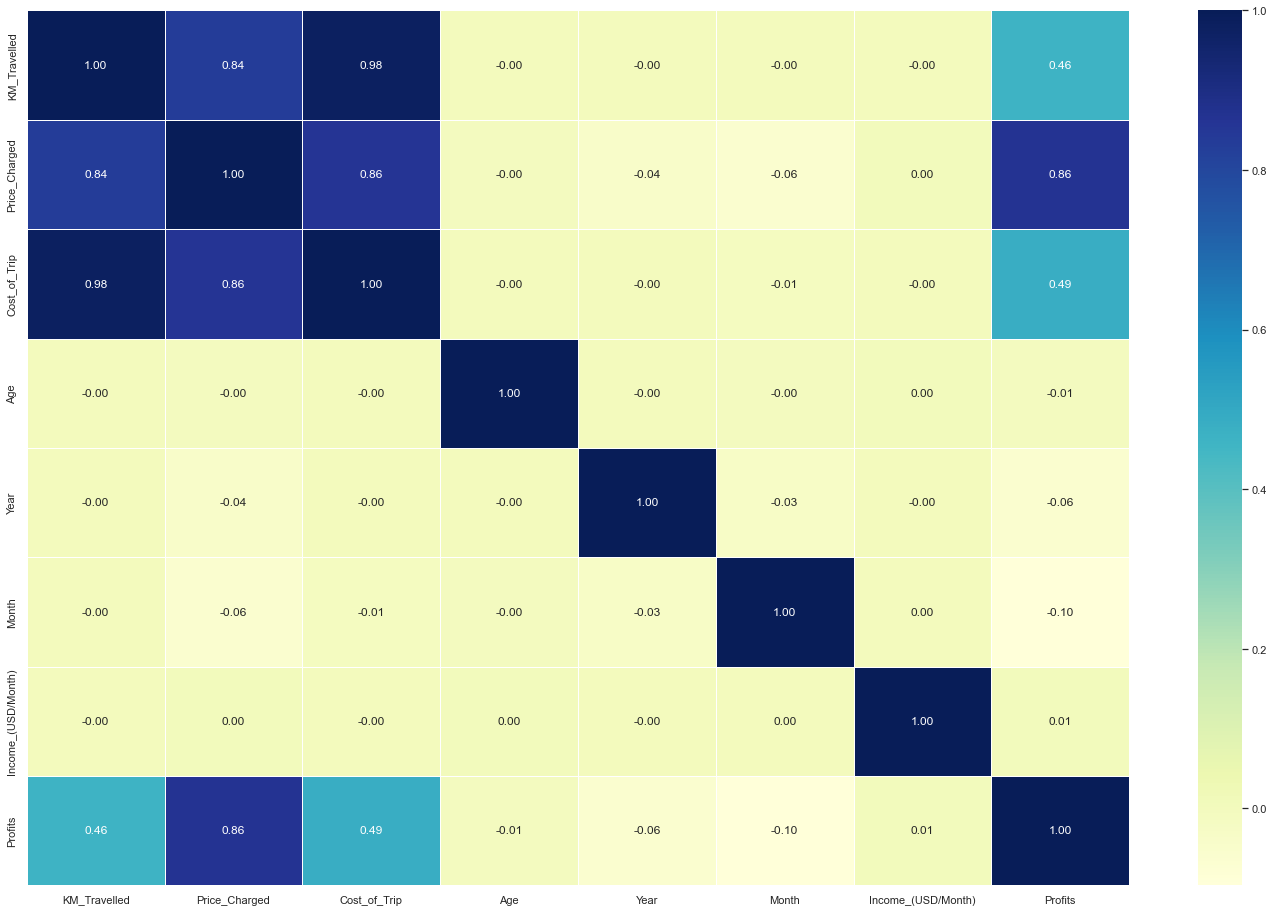

In [75]:
# Visualizing correlation matrix
# Title for Correlation Plot
title_all_graphs = "Correlation Matrix of Continuous Features"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plotting Correlation Matrix
plt.figure(figsize = (22, 15))
ax = sns.heatmap(corr_cont_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');

**Inference from Correlation Analysis:**
* There is a strong correlation between the Profits and Price Charged as expected.
* There is a moderate correlation between Profits and Kilometers Travelled.
* There is also a moderate correlation between Profits and Cost of Trip.
* There are strong correlations between Kilometers Travelled, Price Charged and Cost of Trip.

We will conduct hypothesis tests for the moderate and strong correlations to test if there is a linear relationship between the target, and the features it correlates well with. 

The Hypothesis Test:
* H0: The Target and Feature are independent (p = 0).
                   vs.
* H1: The Target and Feature are dependent (p != 0).

In [76]:
# Pearson's Correlation Test for Profits and Price Charged
stat, p = pearsonr(df['Profits'], df['Price_Charged'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=0.8641539468, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


In [77]:
# Pearson's Correlation Test for Profits and Cost of Trip
stat, p = pearsonr(df['Profits'], df['Cost_of_Trip'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=0.4860560801, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


In [78]:
# Pearson's Correlation Test for Profits and Kilometers Traveled
stat, p = pearsonr(df['Profits'], df['KM_Travelled'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=0.4627681979, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


* **There exists a linear relationship between all the moderate to strongly correlated features and target variable**. 
* This further verifies that the Yellow Cab Company is the better company to invest in because distance travelled, cost of trip and price charged all have a linear relationship with the profits/margins per trip. 
* Since the Yellow Cab Company takes more customers on longer cab rides with higher prices charged, the Yellow Cab Company is also earning more profits than the Pink Cab Company. 
* Due to multicolinearity, we will have to remove the features that correlate strongly with each other to improve modeling. 

### 12. Modeling 
We will create a muliple linear regression model as a baseline with the correlated features to see how well it predicts the profits of both companies. 

#### 12.1 Defining The Features and Target

In [79]:
# Inspect dataframe with combined data of both cab companies
df.head(5)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profits
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21,253.9808


Will complete the modeling for week 3's presentation. 